[EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)

# Part1: Exploratory Data Analysis(EDA)

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")
import warnings

warnings.filterwarnings("ignore")

In [78]:
data = pd.read_csv("../data/train.csv")

In [79]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
data.isnull().sum()  # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age, Cabin and Embarked have null values. I will try to fix them.

#### How many Survived?

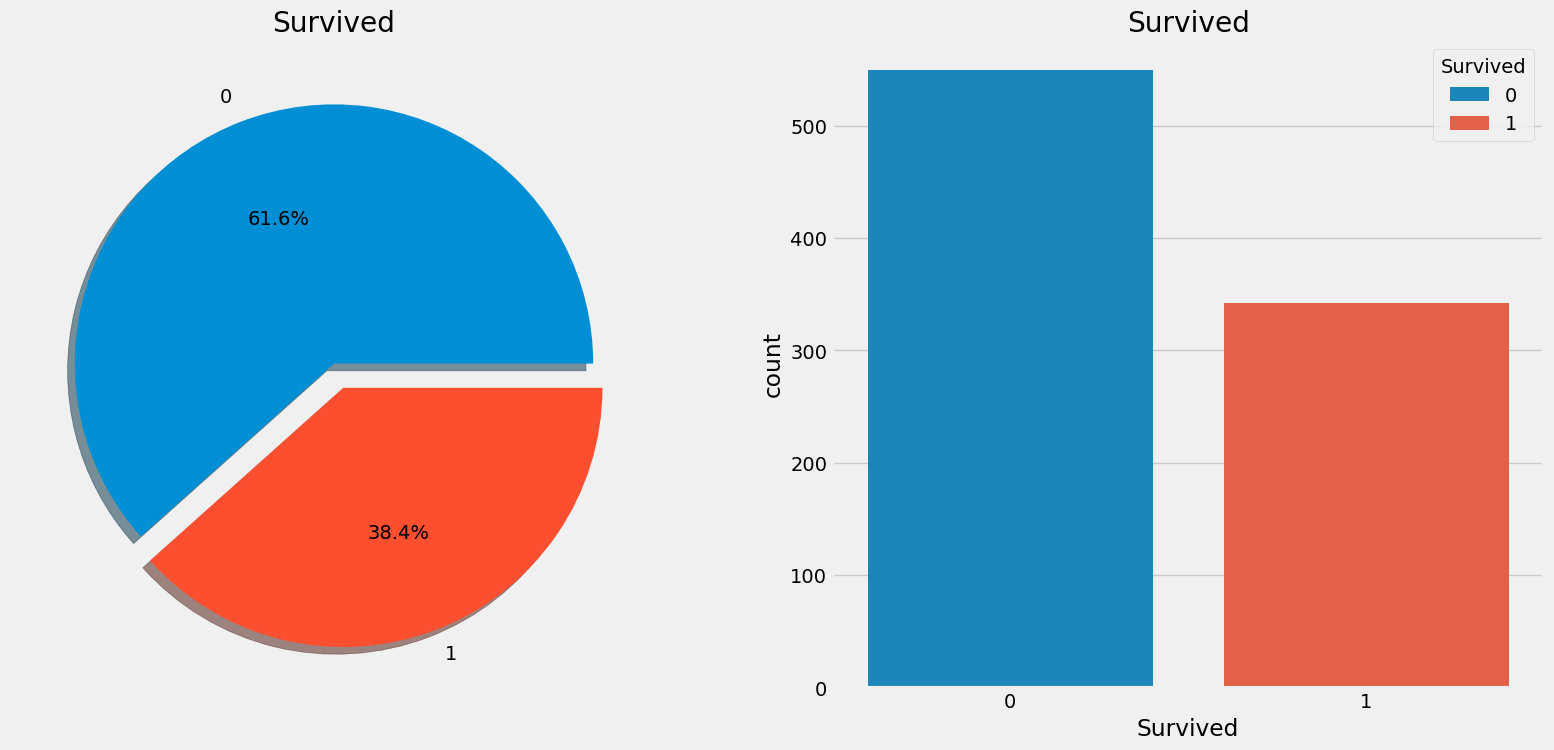

In [81]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["Survived"].value_counts().plot.pie(
    explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True
)
ax[0].set_title("Survived")
ax[0].set_ylabel("")

sns.countplot(data=data, x="Survived", hue="Survived", ax=ax[1])
ax[1].set_title("Survived")

plt.show()

It is evident not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didnt't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

First let us understand the different types of features.

### Types Of Features

#### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

**Categorical Features in the dataset: Sex, Embarked.**

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

#### Continuous Feature:
A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continuous Features in the dataset: Age**

### Analysing The Features

### Sex -> Cateogorical Feature

In [82]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

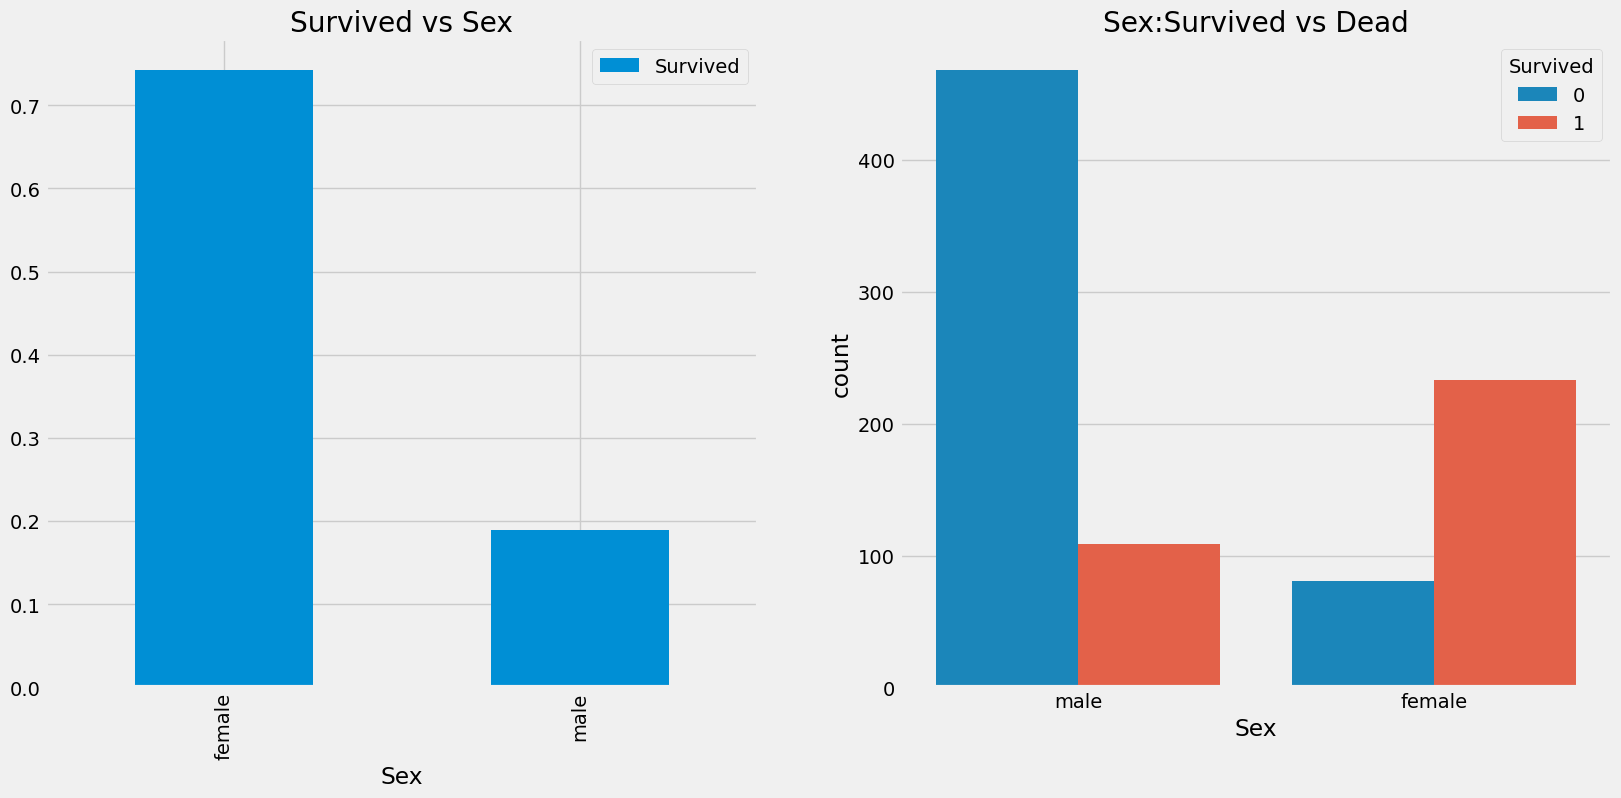

In [83]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot(data=data, x="Sex", hue="Survived", ax=ax[1])
ax[1].set_title("Sex:Survived vs Dead")
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of woman. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18~19%**.

This looks to be a very important feature for modeling. But is it the best? Lets check other features.

### Pclass -> Ordianl Feature

In [84]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(
    cmap="summer_r"
)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


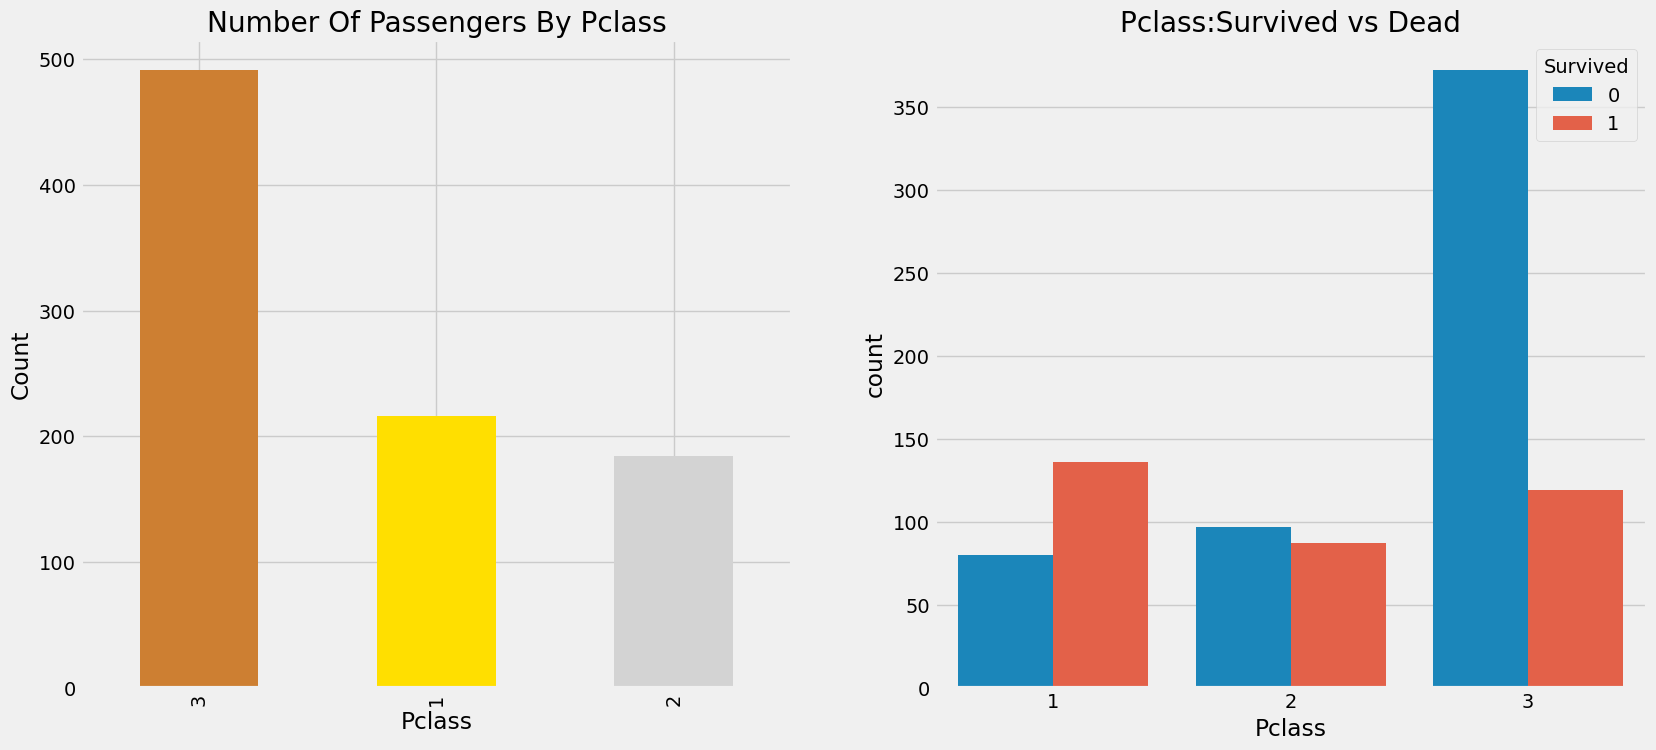

In [85]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data["Pclass"].value_counts().plot.bar(
    color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax=ax[0]
)
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")

sns.countplot(data=data, x="Pclass", hue="Survived", ax=ax[1])
ax[1].set_title("Pclass:Survived vs Dead")

plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

In [86]:
pd.crosstab(
    [data.Sex, data.Survived], data.Pclass, margins=True
).style.background_gradient(cmap="summer_r")

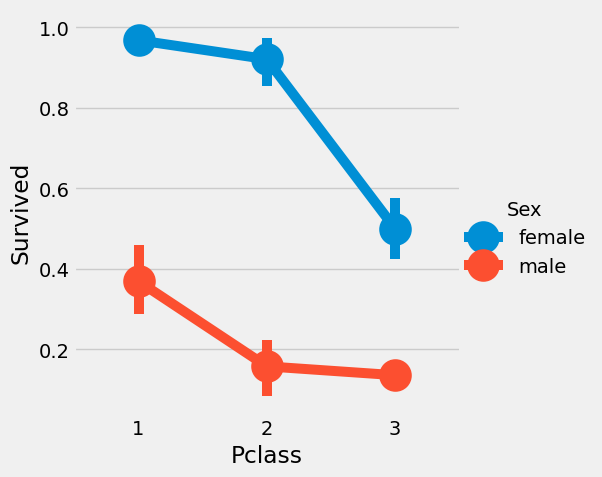

In [87]:
sns.catplot(data=data, x="Pclass", y="Survived", hue="Sex", kind="point")

We use **CatPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **CatPlot**, we can easily infer that survival for **Women from Pclass 1** is about 95~96%, as only 3 out of 94 Women from Pclass 1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

### Age -> Continuous Feature

In [88]:
print("Oldest Passenger was of: ", data["Age"].max(), "Years")
print("Youngest Passenger was of: ", data["Age"].min(), "Years")
print("Average Age on the ship: ", data["Age"].mean(), "Years")

Oldest Passenger was of:  80.0 Years
Youngest Passenger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


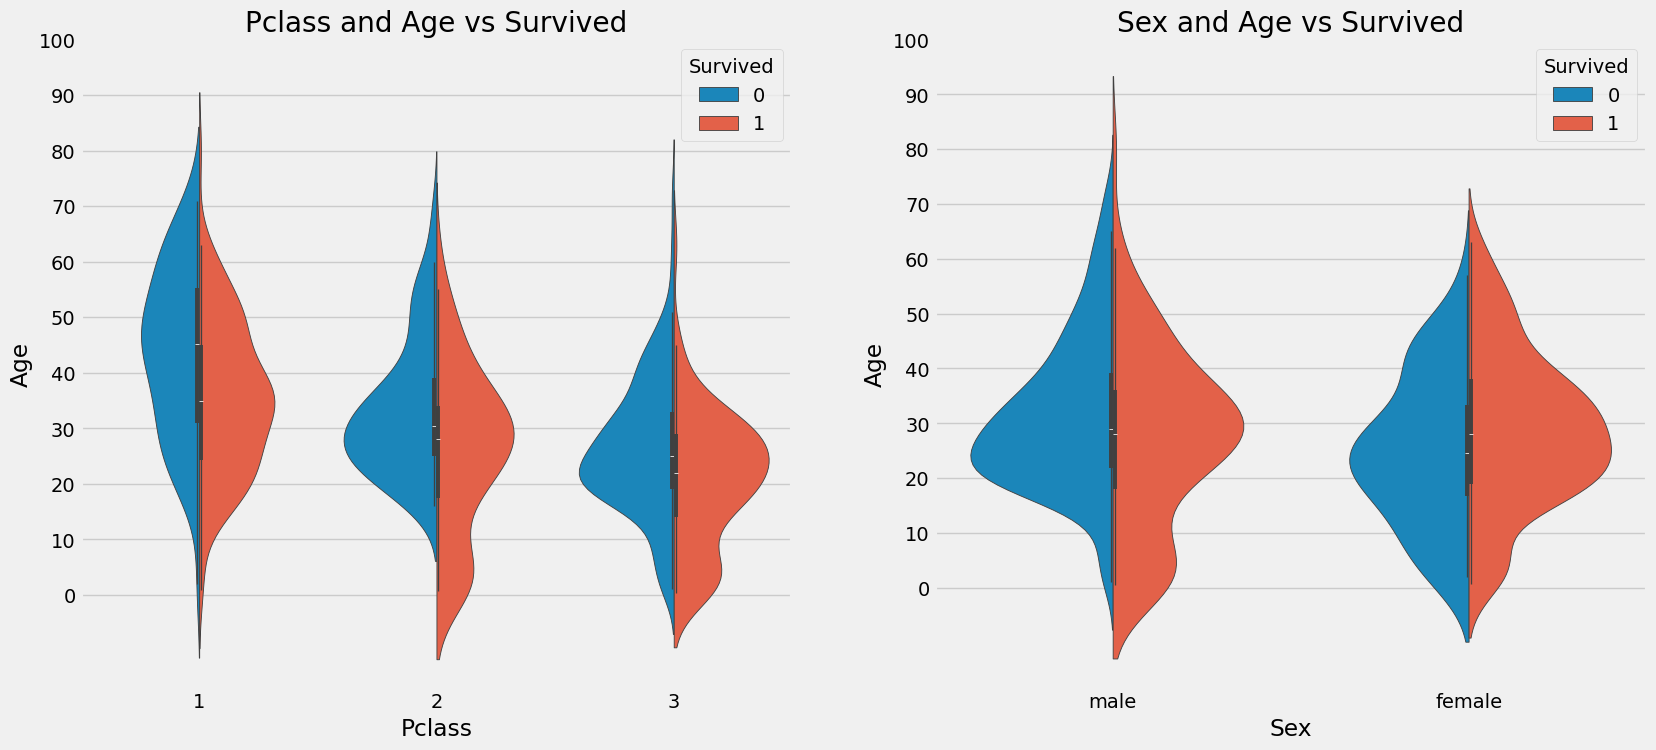

In [89]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(data=data, x="Pclass", y="Age", hue="Survived", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data=data, x="Sex", y="Age", hue="Survived", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

##### Observations:
1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.
2) Survival chances for Passengers aged 20~50 from Pclass 1 is high and is even better for Women.
3) For males, the survival chances decreases with and increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?

Bingo!!, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**"What's In A Name??" -> Feature** :p

In [90]:
data["Initial"] = 0
for i in data:
    data["Initial"] = data.Name.str.extract(
        "([A-Za-z]+)\."
    )  # lets extract the Salutations

Okay so here we are using the Regex: **[A-Za-z]+).**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

In [91]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [92]:
data["Initial"].replace(
    [
        "Mlle",
        "Mme",
        "Ms",
        "Dr",
        "Major",
        "Lady",
        "Countess",
        "Jonkheer",
        "Col",
        "Rev",
        "Capt",
        "Sir",
        "Don",
    ],
    [
        "Miss",
        "Miss",
        "Miss",
        "Mr",
        "Mr",
        "Mrs",
        "Mrs",
        "Other",
        "Other",
        "Other",
        "Mr",
        "Mr",
        "Mr",
    ],
    inplace=True,
)

In [93]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [94]:
# Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull()) & (data.Initial == "Mr"), "Age"] = 33
data.loc[(data.Age.isnull()) & (data.Initial == "Mrs"), "Age"] = 36
data.loc[(data.Age.isnull()) & (data.Initial == "Master"), "Age"] = 5
data.loc[(data.Age.isnull()) & (data.Initial == "Miss"), "Age"] = 22
data.loc[(data.Age.isnull()) & (data.Initial == "Other"), "Age"] = 46

In [95]:
data.Age.isnull().any()  # So no null values left finally

False

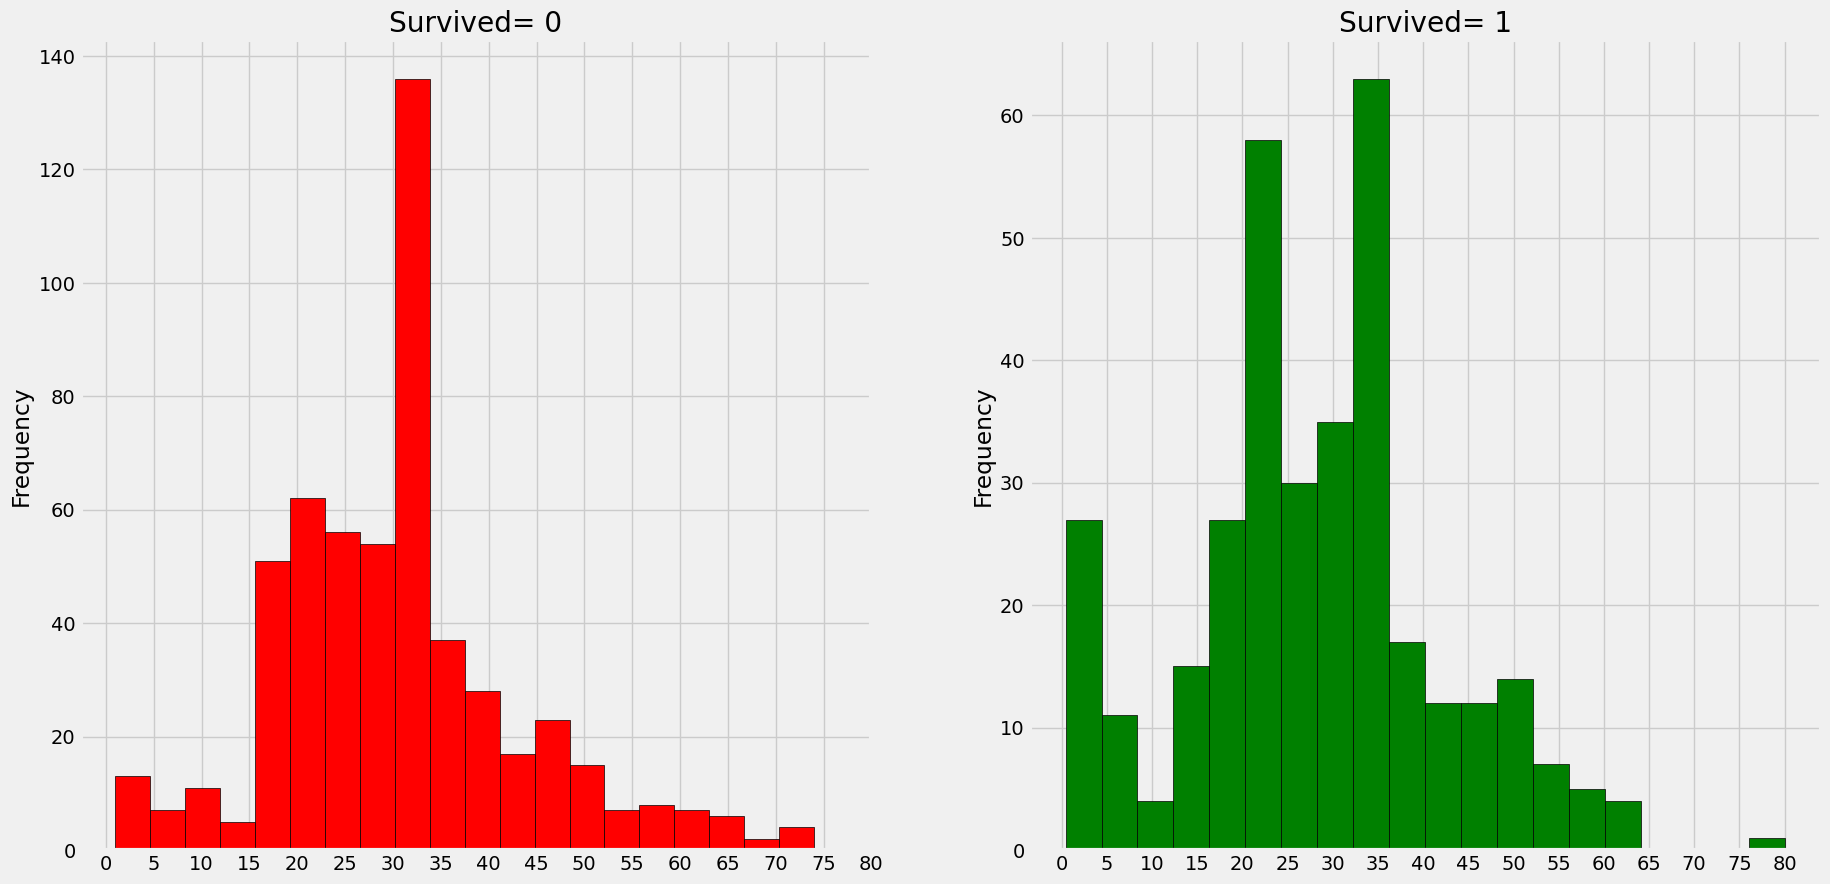

In [96]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data["Survived"] == 0].Age.plot.hist(
    ax=ax[0], bins=20, edgecolor="black", color="red"
)
ax[0].set_title("Survived= 0")
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data["Survived"] == 1].Age.plot.hist(
    ax=ax[1], bins=20, edgecolor="black", color="green"
)
ax[1].set_title("Survived= 1")
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

#### Observations:
1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).
2) The oldest Passenger was saved(80 years).
3) Maximum number of deaths were in the age group of 30~40.

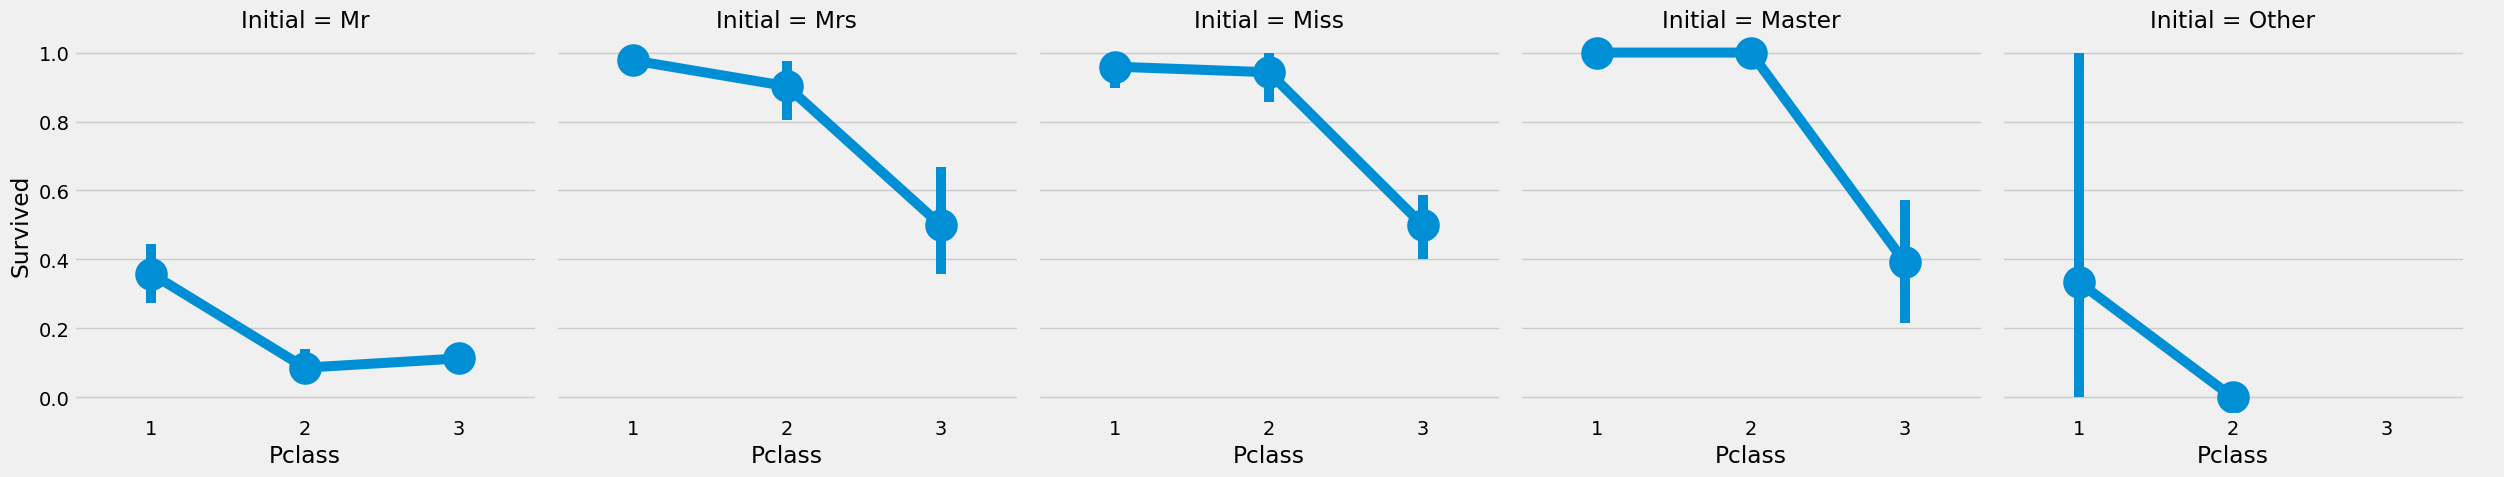

In [97]:
sns.catplot(data=data, x="Pclass", y="Survived", col="Initial", kind="point")

The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical Value

In [98]:
pd.crosstab(
    [data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True
).style.background_gradient(cmap="summer_r")

#### Chances for Survival Port Of Embarkation

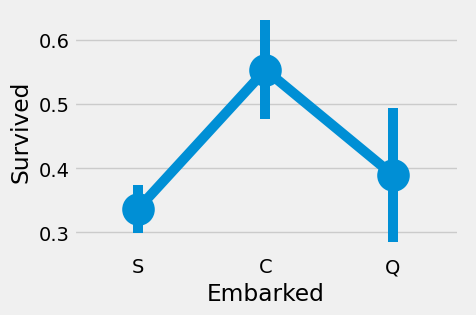

In [99]:
sns.catplot(data=data, x="Embarked", y="Survived", kind="point")
fig = plt.gcf()  # get current figure
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

In [100]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

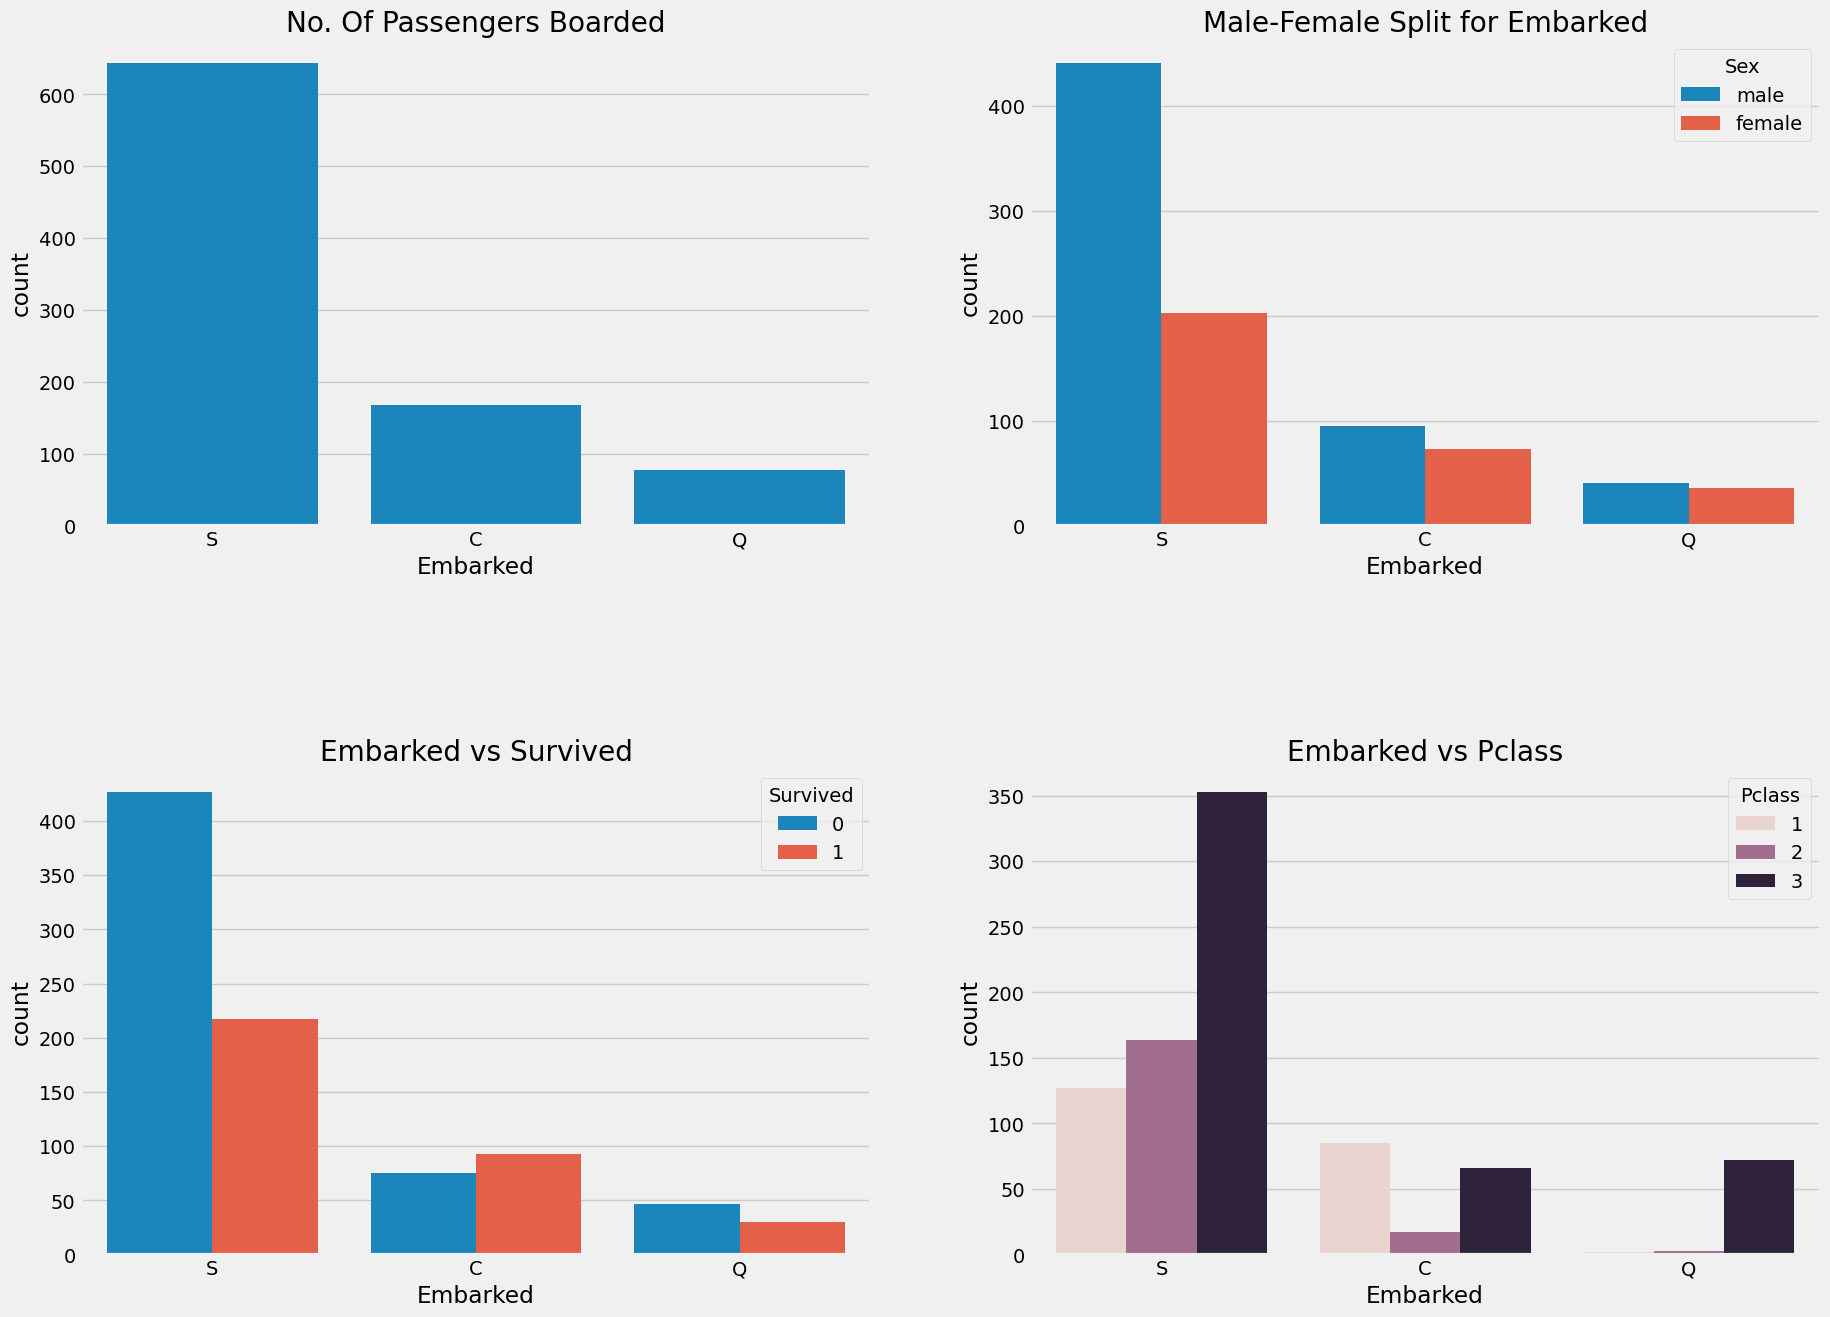

In [101]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(data=data, x="Embarked", ax=ax[0, 0])
ax[0, 0].set_title("No. Of Passengers Boarded")

sns.countplot(data=data, x="Embarked", hue="Sex", ax=ax[0, 1])
ax[0, 1].set_title("Male-Female Split for Embarked")

sns.countplot(data=data, x="Embarked", hue="Survived", ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs Survived")

sns.countplot(data=data, x="Embarked", hue="Pclass", ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Observations:
1) Maximum passengers boarded from S. Majority of them being from Pclass 3.
2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 Passengers.
3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for the survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.
4) Port Q had almost 95% of the passengers were from Pclass 3.

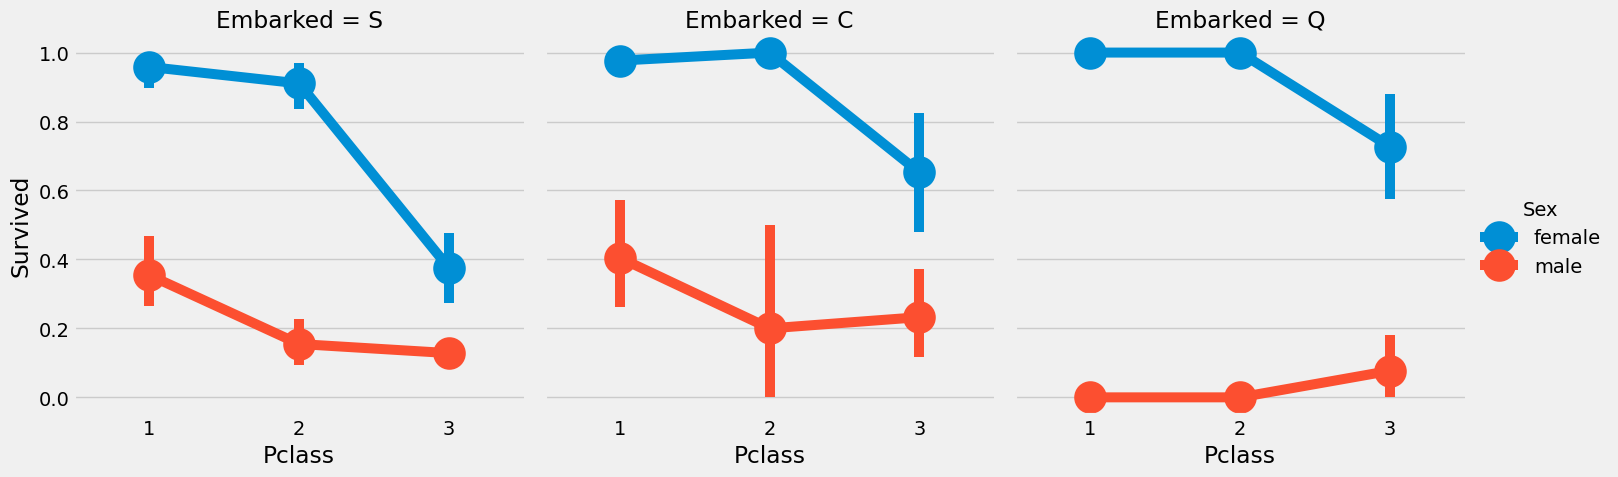

In [102]:
sns.catplot(
    data=data, x="Pclass", y="Survived", hue="Sex", col="Embarked", kind="point"
)

#### Observations:
1) The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the Pclass.
2) Port S looks to be very unlucky for Pclass 3 Passengers as the survival rate for both men and women is very low.**(Money Matters)**
3) Port Q looks to be unluckiest for Men, as almost all were from Pclass 3.

#### Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [103]:
data["Embarked"].fillna("S", inplace=True)

In [104]:
data.Embarked.isnull().any()  # Finally No NaN values

False

### SipSp -> Discrete Feature

The feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [105]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


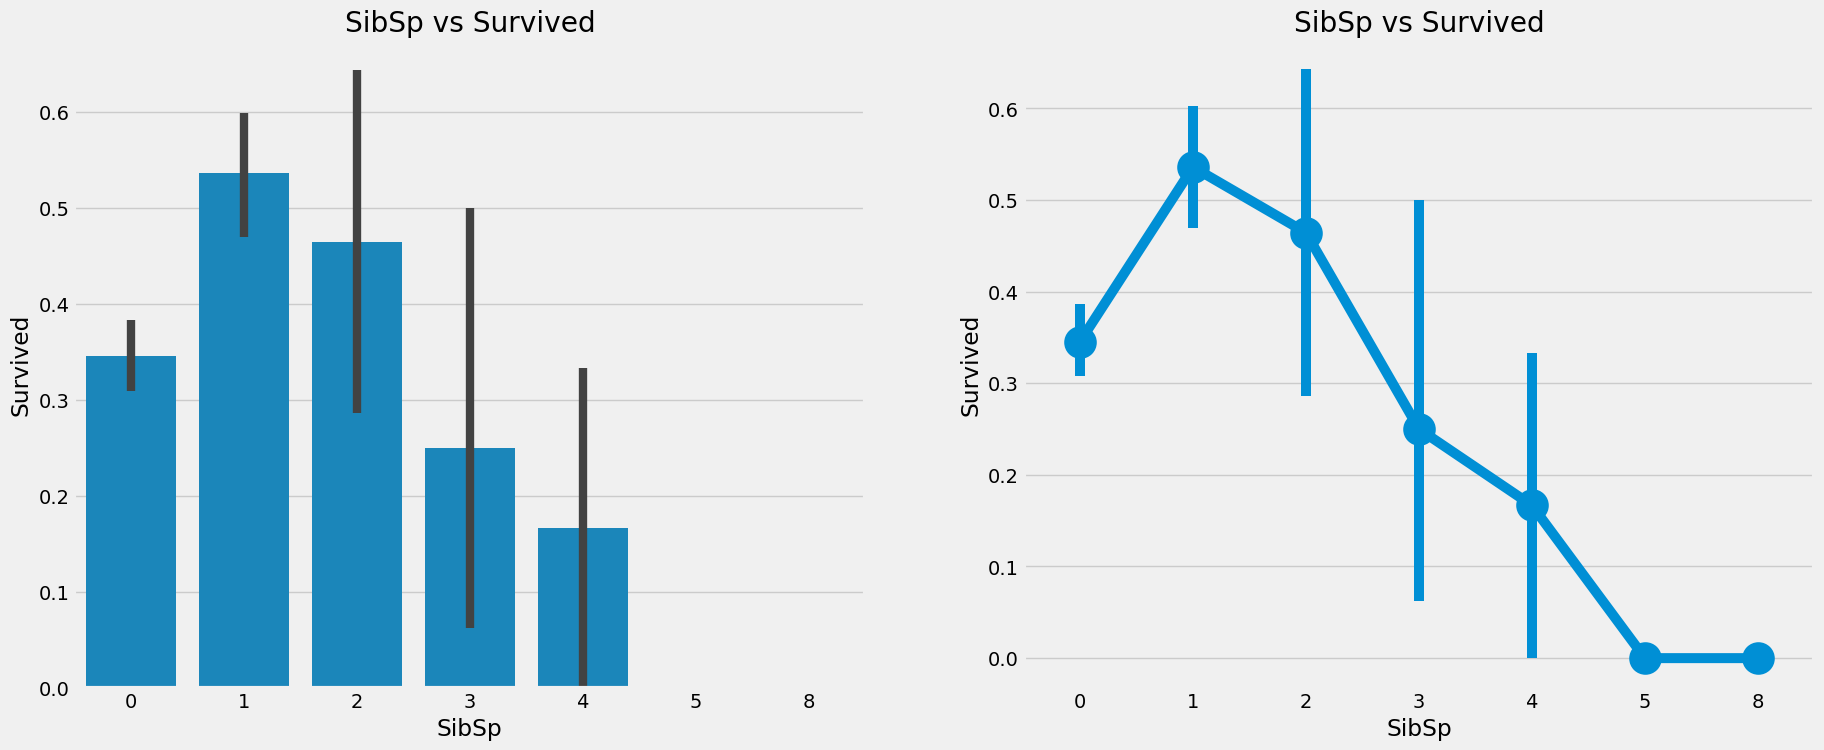

In [106]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=data, x="SibSp", y="Survived", ax=ax[0])
ax[0].set_title("SibSp vs Survived")

sns.pointplot(data=data, x="SibSp", y="Survived", ax=ax[1])
ax[1].set_title("SibSp vs Survived")

plt.show()

In [107]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations:
The barplot and pointplot show that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This make sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?

The reason is Pclass. The crosstab show that Person with SibSp > 3 were all in Pclass 3. It is imminent that all the large families in Pclass 3(>3) died.

### Parch

In [108]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again show that larger families were in Pclass 3.

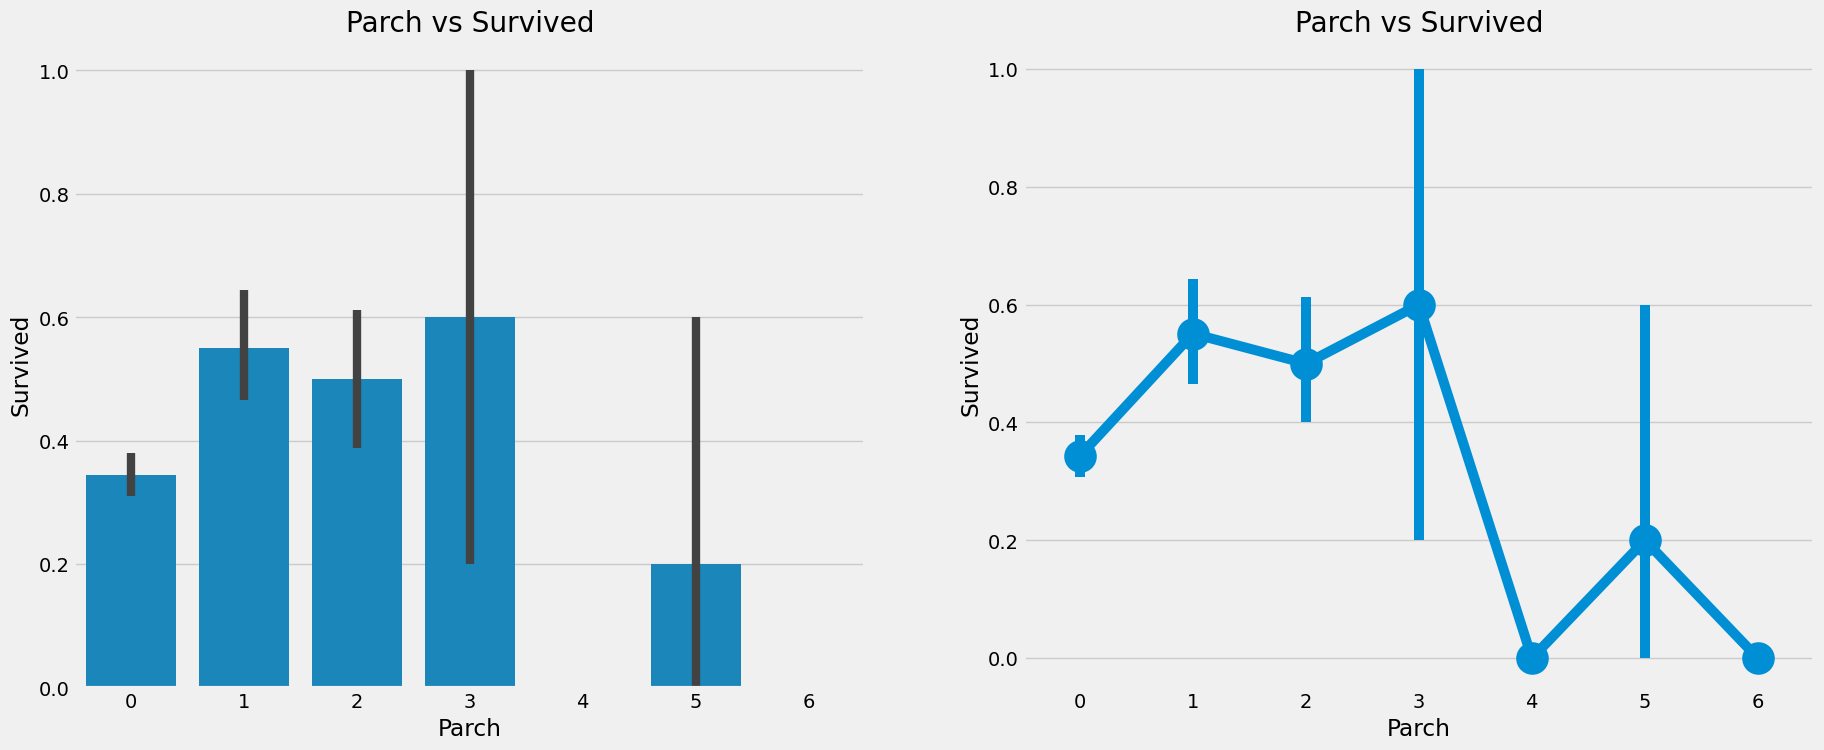

In [109]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=data, x="Parch", y="Survived", ax=ax[0])
ax[0].set_title("Parch vs Survived")

sns.pointplot(data=data, x="Parch", y="Survived", ax=ax[1])
ax[1].set_title("Parch vs Survived")

plt.show()

#### Observations:
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has > 4 parents on the ship.

### Fare -> Continuous Feature

In [110]:
print(f'Highest Fare was: {data["Fare"].max()}')
print(f'Lowest Fare was: {data["Fare"].min()}')
print(f'Average Fare was: {data["Fare"].mean()}')

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


The lowest fare is 0.0. Wow!! a free luxorious ride.

Text(0.5, 1.0, 'Fares in Pclass 3')

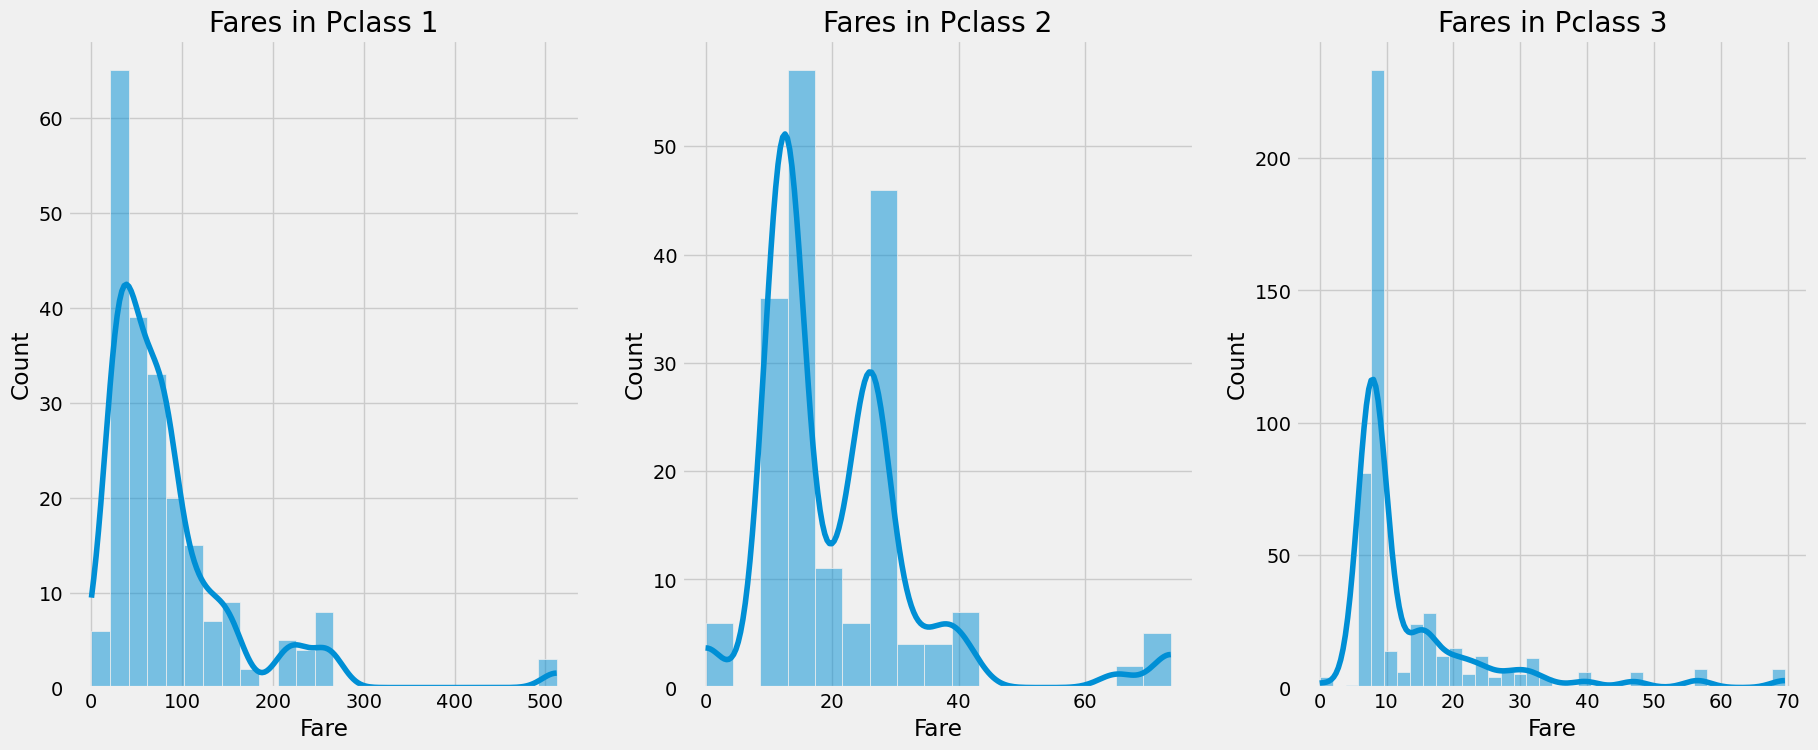

In [111]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.histplot(
    data=data[data["Pclass"] == 1].Fare, kde=True, kde_kws={"bw_adjust": 0.6}, ax=ax[0]
)
ax[0].set_title("Fares in Pclass 1")

sns.histplot(
    data=data[data["Pclass"] == 2].Fare, kde=True, kde_kws={"bw_adjust": 0.6}, ax=ax[1]
)
ax[1].set_title("Fares in Pclass 2")

sns.histplot(
    data=data[data["Pclass"] == 3].Fare, kde=True, kde_kws={"bw_adjust": 0.6}, ax=ax[2]
)
ax[2].set_title("Fares in Pclass 3")

There looks to be a large distribution in the fares of Passengers in Pclass 1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by using binning.

binning이란, 연속적인 데이터를 범위별로 구분해 이산적인 구간으로 나누는 데이터 처리 기법이다. 데이터의 분포를 간단히 표현하거나, 연속적 변수를 특정한 범위로 구분하여 분석하는 데 유용하다.

### Obervations in a Nutshell for all features:
**Sex**: The chance of survival for woman is high as compared to men.

**Pclass**: There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass 3 is very low**. For **women**, the chance of survival from **Pclass 1** is almost 1 and is high too for thos from **Pclass 2**. **Money Wins!!**.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass 1 passengers got up at S**. Passengers at Q were all from **Pclass 3**.

**Parch+SibSp**: Having 1-2 siblings, spouse on board or 1-3 Parents show a greater chance of probability rather than being alone or having a large family travelling with you.

### Correlation Between The Features

In [112]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [113]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [114]:
data.corr?

Signature:
data.corr(
    method: 'CorrelationMethod' = 'pearson',
    min_periods: 'int' = 1,
    numeric_only: 'bool' = False,
) -> 'DataFrame'
Docstring:
Compute pairwise correlation of columns, excluding NA/null values.

Parameters
----------
method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
min_periods : int, optional
    Minimum number of observations required per pair of columns
    to have a valid result. Currently only available for Pearson
    and Spearman correlation.
numeric_only : bool, default False
    Include only `float`, `int` or `boolean` data.

    .. versionadded

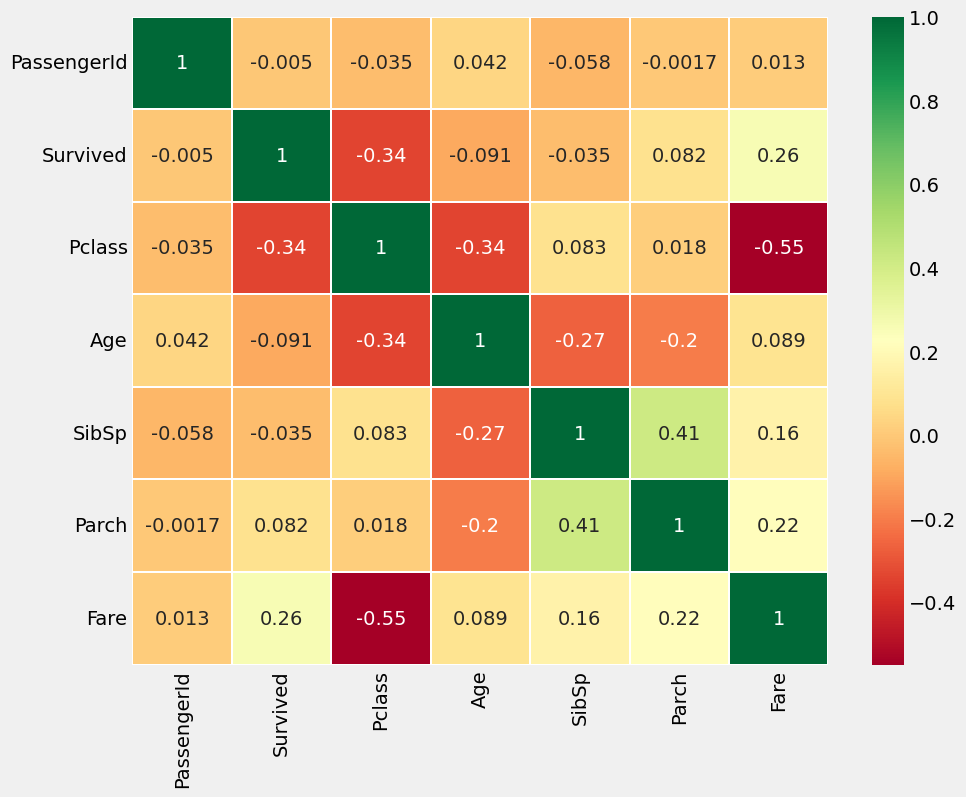

In [115]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="RdYlGn", linewidths=0.2)

fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Interpreting The Heatmap
The first thing to note is that only the numeric features compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION**: If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity(다중공선성)** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

# Part2: Feature Engineering and Data Cleaning

Now what is Feature Engineering?

Whenever we are given a dataset, it is not necessary that all features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initials feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modeling.

### Age_band

#### Problem With Age Feature:
As I have mentioned earlier that **Age is a continuous feature**, there is a problem with Continuous Variables in Machine Learning Models.

**Eg**: If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by ther Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these **continuous values into categorical values** by either Binning or Normalization. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. SO 80/5=16. So bins of size 16.

In [116]:
data["Age_band"] = 0
data.loc[data["Age"] <= 16, "Age_band"] = 0
data.loc[(data["Age"] > 16) & (data["Age"] <= 32), "Age_band"] = 1
data.loc[(data["Age"] > 32) & (data["Age"] <= 48), "Age_band"] = 2
data.loc[(data["Age"] > 48) & (data["Age"] <= 64), "Age_band"] = 3
data.loc[data["Age"] > 64, "Age_band"] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [117]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


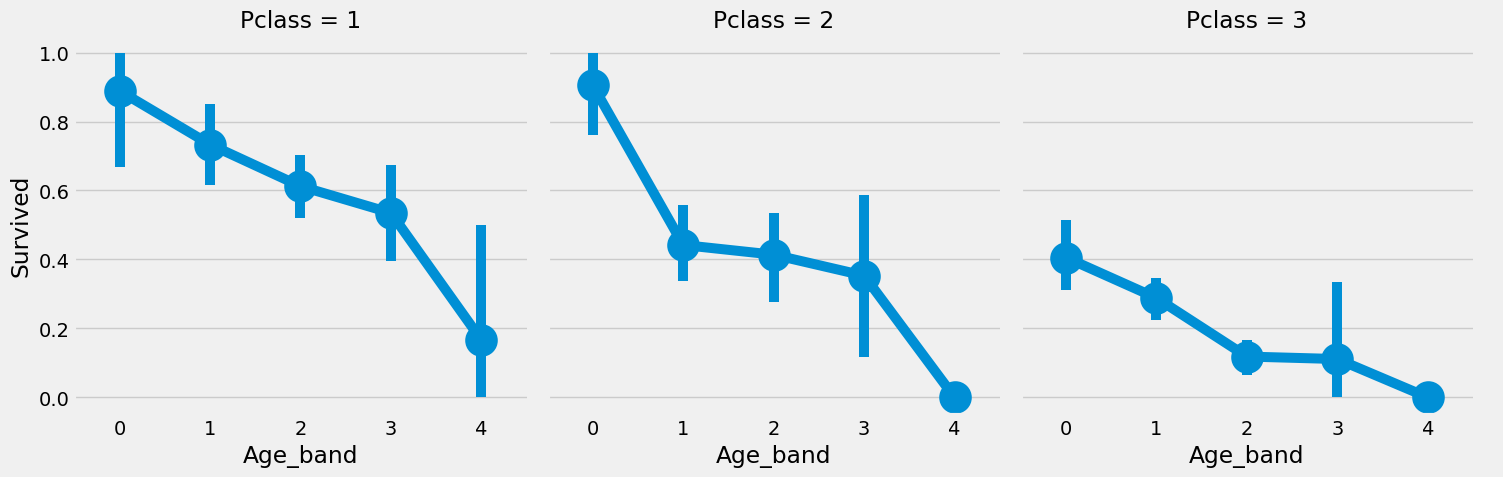

In [118]:
sns.catplot(data=data, x="Age_band", y="Survived", col="Pclass", kind="point")

True that..the survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [119]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]  # family size
data["Alone"] = 0
data.loc[data.Family_Size == 0, "Alone"] = 1  # alone

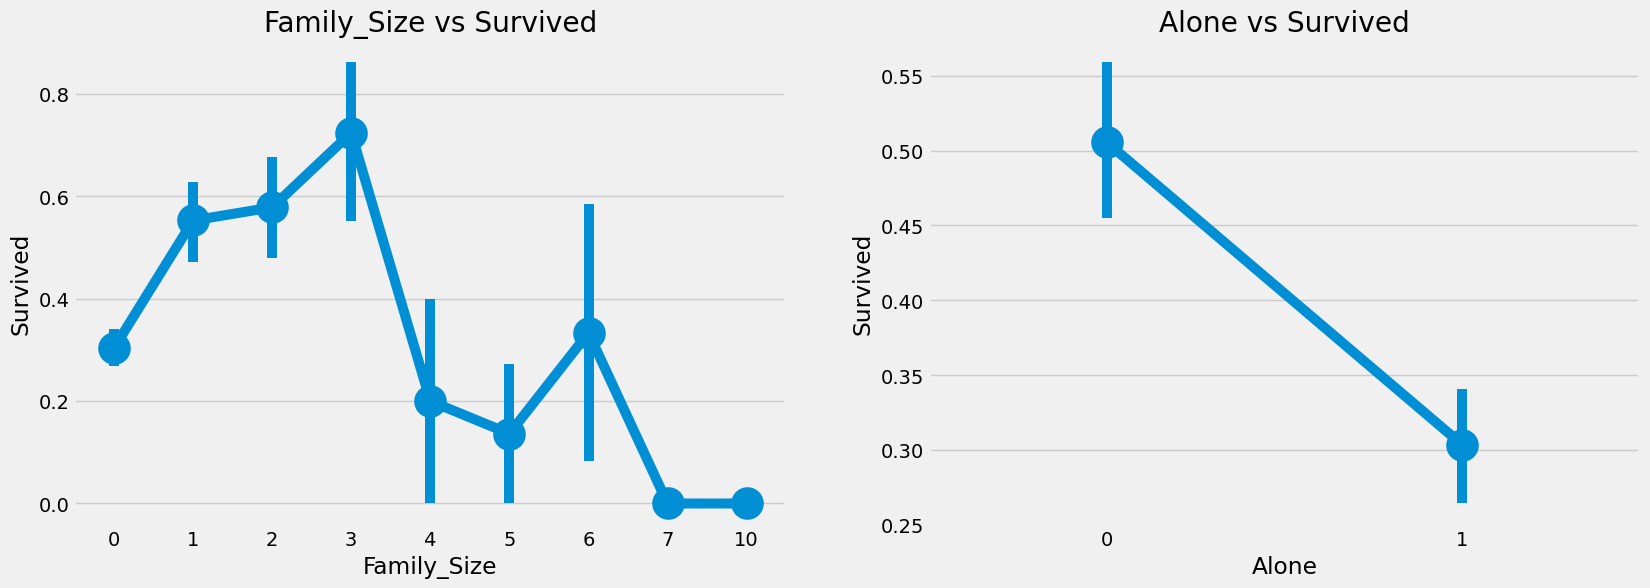

In [120]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.pointplot(data=data, x="Family_Size", y="Survived", ax=ax[0])
ax[0].set_title("Family_Size vs Survived")

sns.pointplot(data=data, x="Alone", y="Survived", ax=ax[1])
ax[1].set_title("Alone vs Survived")

plt.show()

**Family_Size=0 means that the passenger is alone**. Clearly, if you are alone or Family_Size=0, then chances for survival is very low. For family size > 4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this furthur.

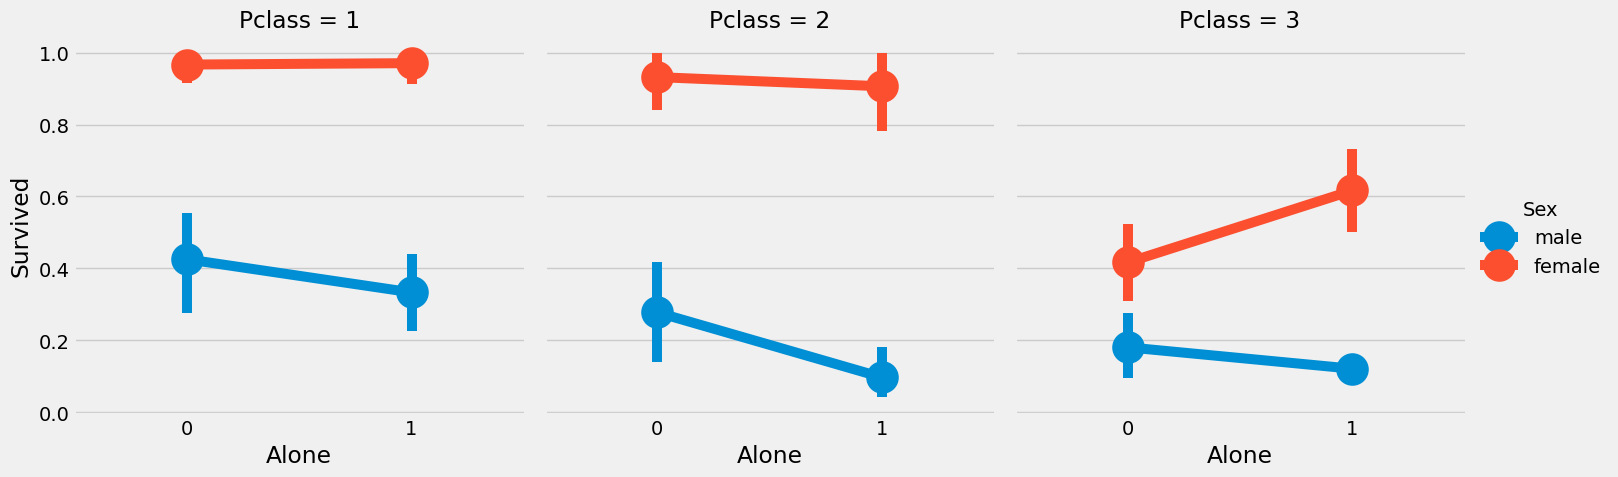

In [121]:
sns.catplot(kind="point", data=data, x="Alone", y="Survived", hue="Sex", col="Pclass")

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass 3 where the chances of females who are alone is high than those with family.

### Fare_Range

Since fare is also continuous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the value according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [122]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(
    cmap="summer_r"
)

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the **fare_range increases, the chances of survival increases**.

Now we cannot pass the Fare_Range as it is. We should convert it into singleton values same as we did in Age_Band.

In [123]:
data["Fare_cat"] = 0
data.loc[data["Fare"] <= 7.91, "Fare_cat"] = 0
data.loc[(data["Fare"] > 7.91) & (data["Fare"] <= 14.454), "Fare_cat"] = 1
data.loc[(data["Fare"] > 14.454) & (data["Fare"] <= 31), "Fare_cat"] = 2
data.loc[(data["Fare"] > 31) & (data["Fare"] <= 513), "Fare_cat"] = 3

<Axes: xlabel='Fare_cat', ylabel='Survived'>

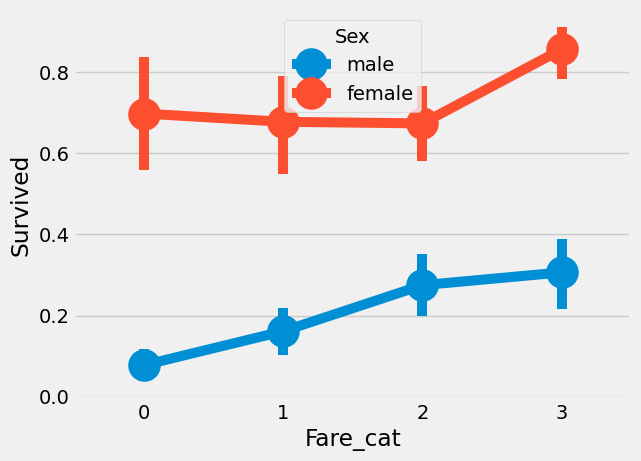

In [124]:
sns.pointplot(data=data, x="Fare_cat", y="Survived", hue="Sex")

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting Strint Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [125]:
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
data["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
data["Initial"].replace(
    ["Mr", "Mrs", "Miss", "Master", "Other"], [0, 1, 2, 3, 4], inplace=True
)

#### Dropping UnNeeded Features
**Name** -> We don't need name feature as it cannot be converted into any categorical value.

**Age** -> We have the Age_band feature, so no need of this.

**Ticket** -> It is any random string that cannot be categorized.

**Fare** -> We have the Fare_cat feature, so unneeded.

**Cabin** -> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range** -> We have the fare_cat feature.

**PassengerId** -> Cannot be categorized.

In [126]:
data.drop(
    ["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"],
    axis=1,
    inplace=True,
)

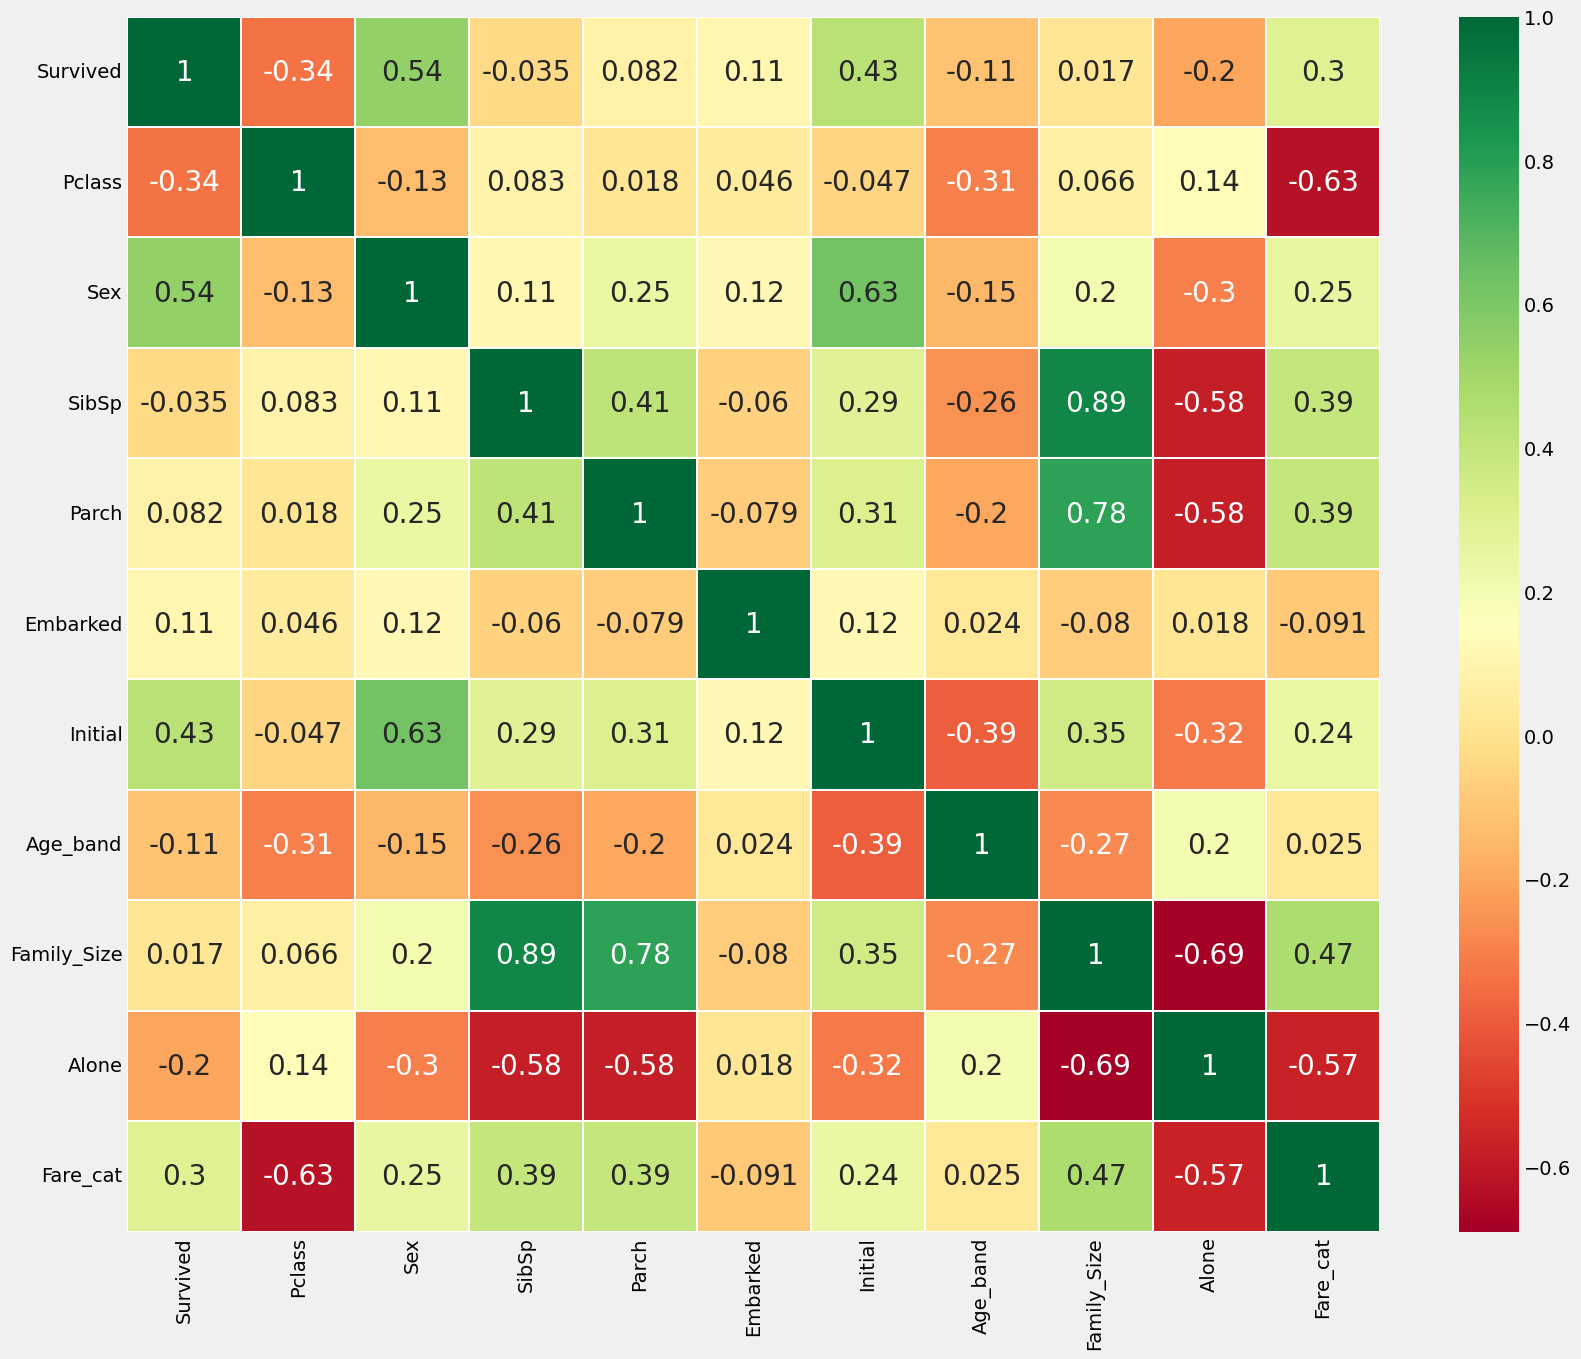

In [127]:
sns.heatmap(
    data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2, annot_kws={"size": 20}
)
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size**.

# Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Followings are the algorithms I will use to make the model:

1) Logistic Regression.
2) Support Vector Machine(Linear and radial)
3) Random Forest
4) K-Nearst Neighbours
5) Naive Bayes
6) Decision Tree
7) Logistic Regression

In [128]:
# importing all the required ML packages
from sklearn import metrics  # accuracy measure
from sklearn import svm  # support vector machine
from sklearn.ensemble import RandomForestClassifier  # random forest
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix  # for confusion matrix
from sklearn.model_selection import train_test_split  # training and testing data split
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.tree import DecisionTreeClassifier  # decision tree

In [129]:
train, test = train_test_split(
    data, test_size=0.3, random_state=0, stratify=data["Survived"]
)

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data["Survived"]

#### SVM과 커널 트릭

##### 1. SVM에서의 유사도 계산

- **SVM**은 분류를 할 때 **데이터들 간의 유사도**를 측정합니다.
- **유사도**는 두 데이터 포인트가 얼마나 비슷한지를 나타내며, 비슷한 데이터는 같은 클래스로 분류될 가능성이 높습니다.
- 유사도를 통해 데이터들을 그룹화하고, 적절한 분류 경계를 설정합니다.

##### 2. 고차원 변환의 필요성

- **비선형 데이터**는 선형 분리할 수 없으므로, 데이터를 **고차원 공간**으로 변환하여 선형 분리가 가능하게 만듭니다.
- 그러나 고차원으로 변환된 후의 데이터 간 **내적**을 계산하는 것은 매우 복잡하고 계산 비용이 큽니다.

##### 3. 커널 트릭의 역할

- **커널 트릭(Kernel Trick)** 은 데이터를 **직접 고차원으로 변환하지 않고도**, 고차원에서 데이터를 처리한 것과 같은 결과를 얻을 수 있게 해줍니다.
- 이를 위해 **커널 함수**는 두 데이터 포인트가 고차원으로 변환된 후의 내적을 직접 계산하지 않고, **원래 차원에서의 데이터**를 이용하여 그 값을 구합니다.

##### 4. 커널 함수의 예시

- **RBF 커널**: 두 데이터 포인트 간의 유사도를 거리 기반으로 계산하여, 고차원 공간에서 분리 가능한 경계를 만듭니다.

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$

##### 5. Linear SVM과 커널 트릭

- **Linear SVM**에서는 커널 트릭을 사용하지 않습니다. 데이터가 **선형적으로 분리 가능**한 경우에는 고차원으로 변환할 필요가 없기 때문입니다.
- Linear SVM은 **저차원 공간**에서 데이터를 선형적으로 구분할 수 있는 **최적의 초평면(hyperplane)**을 찾습니다.
- **비선형 SVM**에서는 데이터가 선형적으로 분리되지 않을 때, **커널 트릭**을 사용하여 고차원으로 변환해 분류를 수행합니다.

##### 6. 요약

- SVM은 **데이터 간의 유사도**를 기반으로 분류 경계를 만듭니다.
- **커널 트릭**은 데이터를 고차원으로 변환하지 않고도 마치 고차원에서 계산한 것처럼 유사도를 효율적으로 계산할 수 있게 해줍니다.
- **Linear SVM**은 데이터가 선형적으로 구분 가능한 경우 커널 트릭을 사용하지 않으며, **비선형 SVM**은 고차원에서 데이터를 분류하기 위해 커널 트릭을 사용합니다.


#### Radial Support Vector Machines(rbf-SVM)

In [130]:
model = svm.SVC(kernel="rbf", C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print(f"Accuracy for rbf SVM is {metrics.accuracy_score(prediction1, test_Y)}")

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [131]:
model = svm.SVC(kernel="linear", C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print(f"Accuracy for linear SVM is {metrics.accuracy_score(prediction2, test_Y)}")

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

##### 1. Logistic Regression 개요
- **Logistic Regression**은 이진 분류 문제에 주로 사용되는 **선형 분류 알고리즘**으로, 입력 데이터가 특정 클래스에 속할 확률을 예측하는 모델.
- **시그모이드 함수**를 사용해 선형 조합의 결과를 0과 1 사이의 확률로 변환하여 분류 수행.
  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = wx + b
$$
  
- Logistic Regression의 결정 경계는 선형적이지만, 확률 계산은 시그모이드 함수를 통해 이루어짐.

##### 2. 다중 클래스 분류에서의 Logistic Regression
- Logistic Regression은 기본적으로 **이진 분류** 알고리즘이지만, **다중 클래스 분류** 문제에도 적용 가능.
- **One-vs-Rest (OvR)**: 각 클래스에 대해 이진 분류 모델을 학습하고, 가장 높은 확률을 가진 클래스를 선택.
- **Softmax Regression (Multinomial Logistic Regression)**: 모든 클래스를 동시에 고려해 각 클래스의 확률을 계산.

##### 3. Logistic Regression과 Softmax Regression의 차이
- **Logistic Regression**:
  - **이진 분류**에서 사용.
  - 시그모이드 함수로 이진 결정(0 또는 1)을 수행.
  - **단일 선형 결정 경계**를 만들어 데이터를 분류.
  
- **Softmax Regression**:
  - **다중 클래스 분류**에서 사용.
  - Softmax 함수로 여러 클래스에 속할 확률을 계산.
  - **여러 개의 선형 결정 경계**를 만들어 다중 클래스를 분류.

##### 4. 비선형 데이터에 대한 한계
- **Logistic Regression**과 **Softmax Regression** 모두 **선형 모델**이므로 **비선형 결정 경계**를 만들 수 없음.
- 비선형 데이터를 직접적으로 분류하기에는 한계가 있으며, 이를 해결하려면 **비선형 변환**이나 **비선형 모델**이 필요함.
  - 예: 다항식 변환, 커널 트릭, 신경망(Neural Networks), 비선형 SVM 등.

##### 5. L1, L2 정규화
- **L1 정규화 (Lasso)**: 가중치의 절대값 합에 페널티를 부과해 **일부 가중치를 0**으로 만들어 불필요한 피처를 제거하는 특징. 피처 선택에 유용.
$$
L(\theta) = \text{Loss Function} + \lambda \sum_{i=1}^{n} |\theta_i|
$$
- **L2 정규화 (Ridge)**: 가중치의 제곱합에 페널티를 부과해 **모든 피처를 사용**하면서 가중치를 줄여 **과적합을 방지**. 가중치를 작게 만드나 0으로 만들지는 않으므로 모델이 특정 피처에 과도하게 의존하지 않게 만듦.
$$
L(\theta) = \text{Loss Function} + \lambda \sum_{i=1}^{n} \theta_i^2
$$

##### 6. 요약
- **Logistic Regression**은 이진 분류 문제에서 효과적이며, 시그모이드 함수를 통해 선형 결정 경계를 설정하여 분류를 수행.
- **Softmax Regression**은 다중 클래스 분류 문제를 해결하는 선형 모델로, 여러 선형 결정 경계를 설정하여 각 클래스에 속할 확률을 계산.
- 두 모델 모두 **비선형 데이터**에 적합하지 않으며, 비선형 데이터를 처리하려면 **비선형 모델**이 필요.
- **L1, L2 정규화**는 모델이 과적합되지 않도록 가중치를 조정하여 일반화 성능을 향상시킴.

In [132]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print(
    f"The accuracy of the Logistic Regression is {metrics.accuracy_score(prediction3, test_Y)}"
)

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

##### 1. **주요 개념**
- **루트 노드 (Root Node)**: 트리의 시작점. 데이터를 처음으로 분리하는 노드.
- **내부 노드 (Internal Node)**: 데이터 분할을 계속하는 중간 노드.
- **리프 노드 (Leaf Node)**: 최종적으로 예측값 또는 분류 결과가 결정되는 노드.
- **분할 (Split)**: 각 노드에서 데이터를 두 개 이상의 하위 그룹으로 나누는 과정.

##### 2. **알고리즘 작동 방식**
1. **특성 탐색**: 모든 특성(feature)을 고려하여 분할 기준 선택.
2. **불순도 측정**: 분류 문제에서는 **지니 지수(Gini Index)** 또는 **엔트로피(Entropy)**, 회귀 문제에서는 **분산(Variance)** 사용.
3. **최적 분할**: 불순도를 최소화하는 분할 기준을 선택해 데이터를 나눔.
4. **재귀적 분할**: 분할된 하위 노드에서 다시 최적의 기준을 반복하여 찾음.

분할의 지표
- **엔트로피(Entropy)**: 혼잡도를 측정.
$$
\text{Entropy} = - \sum p_i \log_2(p_i)
$$
- **지니 지수(Gini Index)**: 불순도 측정.
$$
\text{Gini Index} = 1 - \sum p_i^2
$$
- **정보 이득(Information Gain)**: 분할 전후 엔트로피 감소량.
$$
\text{Information Gain} = \text{Entropy of parent} - \left(\frac{n_L}{n}\text{Entropy of left} + \frac{n_R}{n}\text{Entropy of right}\right)
$$
- **분산 감소(Variance Reduction)**: 회귀 문제에서 값의 분산 감소량.

##### 3. **장점**
- **직관적인 해석**: 트리 구조가 시각적이어서 쉽게 이해 가능.
- **비선형 데이터 처리**: 비선형 데이터도 효과적으로 처리.
- **전처리 필요 없음**: 결측값 처리, 스케일링 등이 필요 없음.

##### 4. **단점**
- **과적합**: 깊은 트리는 훈련 데이터에 과도하게 특화될 위험.
- **불안정성**: 데이터가 변할 경우 트리 구조가 크게 변할 수 있음.

##### 5. **해결책**
- **Pruning(가지치기)**: 트리의 크기를 줄여 과적합을 방지.
- **앙상블 기법**: 랜덤 포레스트(Random Forest)와 같은 기법을 사용하여 성능 향상.

In [133]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print(
    f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction4, test_Y)}"
)

The accuracy of the Decision Tree is 0.8059701492537313


#### K-최근접 이웃 알고리즘 (K-Nearest Neighbors, KNN)

##### 개요
- **KNN**은 **비지도 학습** 알고리즘으로, **분류**와 **회귀** 문제에 사용됨.
- 새로운 데이터는 가장 가까운 K개의 이웃 데이터를 참고해 결정됨.

##### 주요 개념
1. **거리 기반 분류**: 유클리드 거리 등을 사용해 새로운 데이터와 가까운 K개의 데이터를 찾음.
2. **K값**: 이웃의 개수로, 사용자가 설정.
   - **K가 작을수록**: 모델이 노이즈에 민감.
   - **K가 클수록**: 과도한 일반화 가능성.
3. **분류**: K개의 이웃 중 가장 많은 클래스(레이블)로 분류.
4. **회귀**: K개의 이웃 값의 평균으로 예측.

##### 장점
- **단순함**: 직관적이고 이해가 쉬움.
- **학습 단계 없음**: 바로 예측 가능.

##### 단점
- **계산 비용**: 데이터셋이 클수록 계산 비용 증가.
- **차원의 저주**: 고차원 데이터에서 성능 저하.
- **정규화 필요**: 데이터의 스케일 맞추기 필요.

##### 적용 사례
- 이미지 및 문서 분류
- 추천 시스템
- 회귀 문제

In [134]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print(f"The accuracy of the KNN is {metrics.accuracy_score(prediction5, test_Y)}")

The accuracy of the KNN is 0.8134328358208955


Now the accuracy for the KNN model changes as we change the values for n_neighbors attribute. The default value is **5**. Lets check the accuracies over various value of n_neighbors.

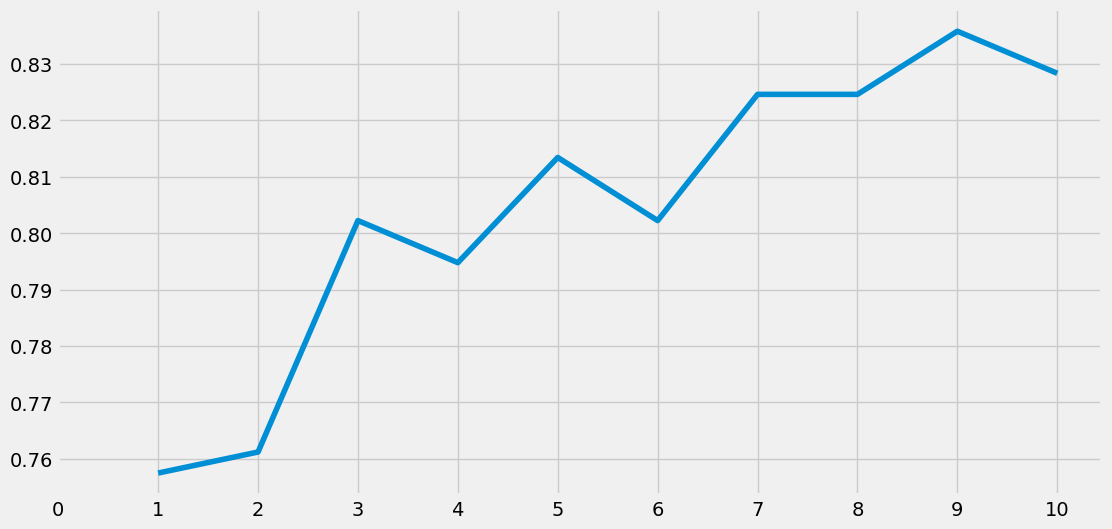

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as 0.835820895522388


In [135]:
a_index = list(range(1, 11))
a = pd.Series(dtype=float)
x = list(range(11))
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a[i] = metrics.accuracy_score(prediction, test_Y)

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print(
    f"Accuracies for different values of n are: {a.values} with the max value as {a.values.max()}"
)

#### Gaussian Naive Bayes

##### Gaussian Naive Bayes 개념
Gaussian Naive Bayes는 **Naive Bayes** 알고리즘의 변형으로, **연속적인 데이터**에 적용할 때 사용되는 확률 분류 알고리즘입니다. Naive Bayes는 베이즈 정리를 기반으로 하며, 각 특성(feature)이 독립적이라고 가정하는 간단하고 효율적인 모델입니다. Gaussian Naive Bayes는 연속적인 특성을 다룰 때, 각 특성이 **정규 분포(Gaussian Distribution)**를 따른다고 가정합니다.

##### Gaussian Naive Bayes의 수식
Gaussian Naive Bayes에서 각 특성 $ x_i $가 주어진 클래스 $ C $에서 나타날 조건부 확률은 다음과 같이 계산됩니다:

$$
P(x_i | C) = \frac{1}{\sqrt{2\pi\sigma_C^2}} \exp\left(-\frac{(x_i - \mu_C)^2}{2\sigma_C^2}\right)
$$

- $ \mu_C $: 클래스 $ C $의 평균
- $ \sigma_C^2 $: 클래스 $ C $의 분산
- $ x_i $: 특성 값

##### 예시: 스팸 메일 분류

##### 문제 설정
- 클래스 $ C_1 $: '스팸' 메일
- 클래스 $ C_2 $: '정상' 메일
- 특성 $ x_1 $: 이메일 길이 (예: 150 단어)
- 목표: 이메일 길이 $ x_1 = 150 $일 때, 스팸일 확률과 정상 메일일 확률 계산

##### 가정된 값
- 스팸 메일 클래스 $ C_1 $: $ \mu_1 = 100 $, $ \sigma_1 = 20 $
- 정상 메일 클래스 $ C_2 $: $ \mu_2 = 200 $, $ \sigma_2 = 30 $
- 사전 확률: $ P(C_1) = 0.4 $, $ P(C_2) = 0.6 $

##### 클래스별 확률 계산

1. **스팸 메일 클래스** $ C_1 $에서 이메일 길이 150일 확률:

$$
P(x_1 = 150 | C_1) \approx 0.00061
$$

2. **정상 메일 클래스** $ C_2 $에서 이메일 길이 150일 확률:

$$
P(x_1 = 150 | C_2) \approx 0.00292
$$

##### 사후 확률 계산 (Bayes 정리 적용)

$$
P(C_1 | x_1 = 150) = 0.163
$$
$$
P(C_2 | x_1 = 150) = 0.837
$$

따라서, 이메일 길이가 150일 때 **정상 메일**일 확률이 더 높습니다.

##### 수치 추정 방법
Gaussian Naive Bayes에서 사용되는 수치들은 훈련 데이터로부터 추정됩니다.
- **평균 $ \mu $**: 해당 클래스에 속하는 데이터 포인트들의 평균.
- **표준편차 $ \sigma $**: 해당 클래스에 속하는 데이터 포인트들의 분산을 사용해 계산.
- **사전 확률 $ P(C) $**: 각 클래스가 전체 데이터에서 차지하는 비율로 계산.



In [136]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print(
    f"The accuracy of the NaiveBayes is {metrics.accuracy_score(prediction6, test_Y)}"
)

The accuracy of the NaiveBayes is 0.8134328358208955


#### 랜덤 포레스트(Random Forest)

랜덤 포레스트는 앙상블 학습 방법 중 하나로, 다수의 결정 트리를 결합해 예측 성능을 향상시키는 알고리즘입니다. 분류(Classification)와 회귀(Regression) 문제에 주로 사용됩니다.

##### 핵심 개념
- **앙상블 학습**: 여러 결정 트리를 결합해 성능을 향상시킴.
- **부트스트랩핑**: 훈련 데이터를 무작위로 샘플링하여 트리마다 다른 데이터를 사용.
- **특성 무작위성**: 노드 분할 시 일부 특성만 무작위로 선택하여 고려.
- **다수결 투표/평균**: 분류는 다수결 투표, 회귀는 평균으로 결과를 도출.

##### 장점
- **과적합 방지**: 여러 트리를 사용해 과적합을 방지.
- **높은 정확도**: 단일 트리보다 더 높은 예측 성능.
- **안정성**: 노이즈와 데이터 변화에 민감하지 않음.
- **다양한 문제 적용**: 분류와 회귀 문제 모두에 사용 가능.

##### 단점
- **해석 어려움**: 모델이 복잡해 해석이 어려움.
- **느린 예측 속도**: 많은 트리를 사용하므로 예측 속도가 느릴 수 있음.

In [137]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print(
    f"The accuracy of the Random Forests is {metrics.accuracy_score(prediction7, test_Y)}"
)

The accuracy of the Random Forests is 0.8134328358208955


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over? The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model, we use **Cross Validation**.

# Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class 1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1) The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2) Let's say we divide the dataset into (k=5) parts. we reserve 1 part for testing and train the algorithm over the 4 parts.

3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [138]:
from sklearn.model_selection import KFold  # for K-Fold Cross Validation
from sklearn.model_selection import cross_val_predict, cross_val_score

kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = [
    "Linear Svm",
    "Radial Svm",
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
]
models = [
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf"),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({"CV Mean": xyz, "Std": std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.809238,0.026281
Naive Bayes,0.801386,0.028999
Random Forest,0.809263,0.040138


<Axes: >

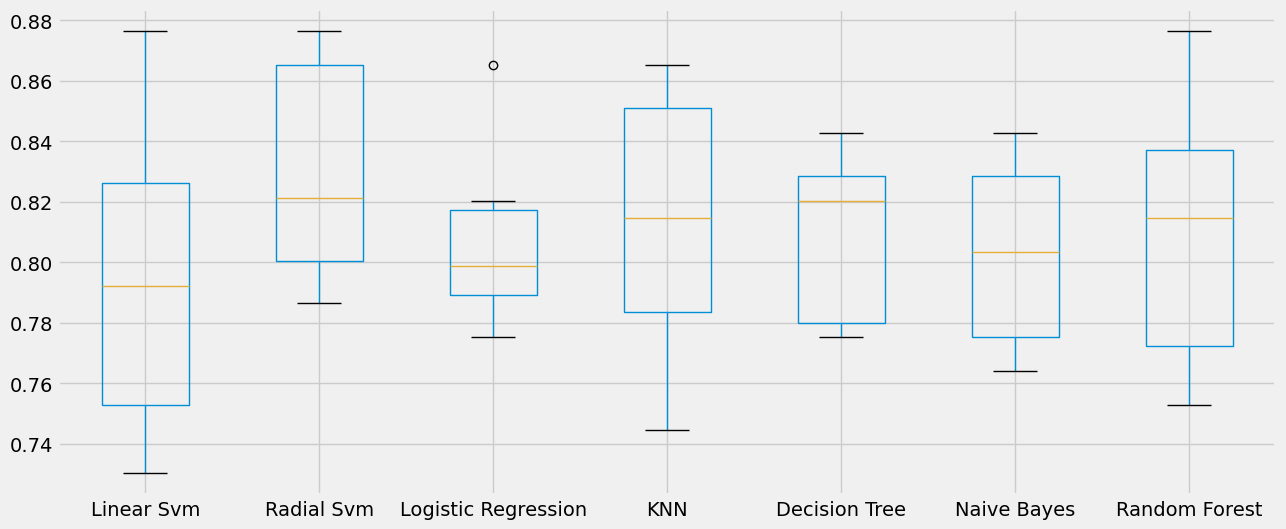

In [139]:
plt.subplots(figsize=(14, 6))
box = pd.DataFrame(accuracy, index=classifiers)
box.T.boxplot()

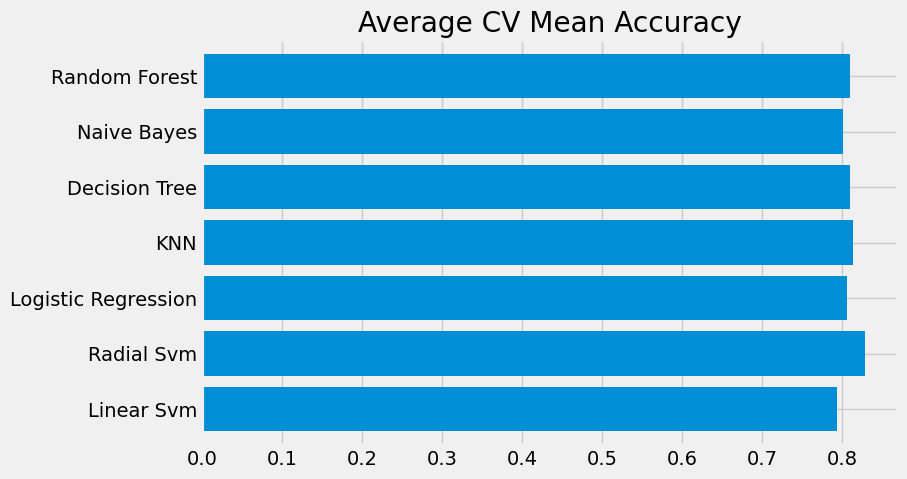

In [140]:
new_models_dataframe2["CV Mean"].plot.barh(width=0.8)
plt.title("Average CV Mean Accuracy")
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

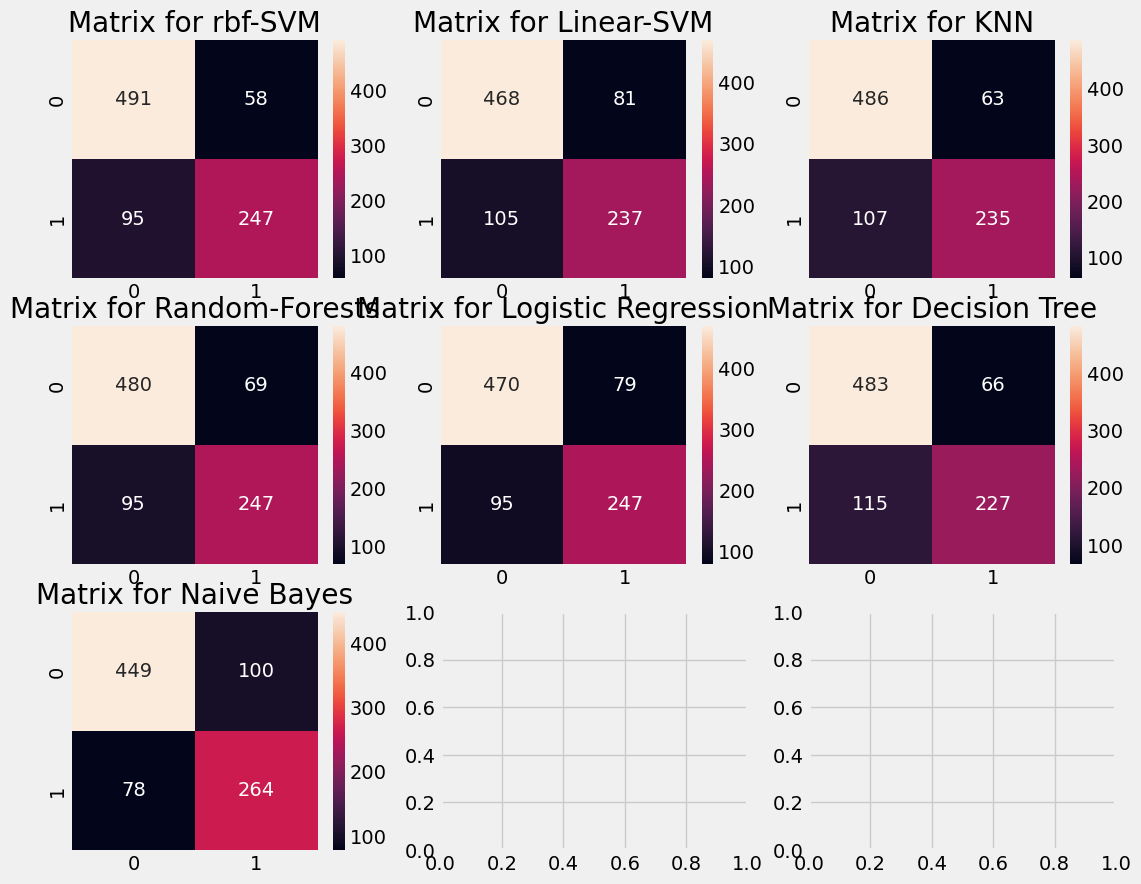

In [141]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
y_pred = cross_val_predict(svm.SVC(kernel="rbf"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt="2.0f")
ax[0, 0].set_title("Matrix for rbf-SVM")
y_pred = cross_val_predict(svm.SVC(kernel="linear"), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt="2.0f")
ax[0, 1].set_title("Matrix for Linear-SVM")
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt="2.0f")
ax[0, 2].set_title("Matrix for KNN")
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt="2.0f")
ax[1, 0].set_title("Matrix for Random-Forests")
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt="2.0f")
ax[1, 1].set_title("Matrix for Logistic Regression")
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt="2.0f")
ax[1, 2].set_title("Matrix for Decision Tree")
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt="2.0f")
ax[2, 0].set_title("Matrix for Naive Bayes")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
The left diagonal show the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM.

1) The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.
2) **Errors** -> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting survived as dead.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

#### Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box. which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RomdomForests.

##### SVM

In [142]:
from sklearn.model_selection import GridSearchCV

# C값이 작을수록 더 강한 규제를 적용하여 과적합을 방지
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# gamma: SVM에서 RBF 커널의 곡률을 제어. 값이 클수록 데이터 포인트의 영향을 좁은 범위에서 고려
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ["rbf", "linear"]
hyper = {"kernel": kernel, "C": C, "gamma": gamma}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


##### Random Forests

In [143]:
n_estimators = range(100, 1000, 100)
hyper = {"n_estimators": n_estimators}

gd = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True
)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-SVM is **82.82% with C=0.4 and gamma=0.3**. For RandomForest, score is about **81.93% with n_estimators=300**.

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many poeple about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1) Voting Classifier
2) Bagging
3) Boosting

### Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [144]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(
    estimators=[
        ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ("RBF", svm.SVC(probability=True, kernel="rbf", C=0.4, gamma=0.3)),
        ("RFor", RandomForestClassifier(n_estimators=300, random_state=0)),
        ("LR", LogisticRegression(C=0.05)),
        ("DT", DecisionTreeClassifier(random_state=0)),
        ("NB", GaussianNB()),
        ("svm", svm.SVC(kernel="linear", probability=True)),
    ],
    voting="soft",
).fit(train_X, train_Y)

print("The accuracy for ensembled model is:", ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print("The cross validation score is", cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validation score is 0.8238202247191012


### Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance(분산이 높은 모델은 훈련 데이터에 민감하여 작은 변화에도 결과가 크게 달라질 수 있는 모델을 의미합니다. 배깅은 여러 샘플을 이용해 다양한 모델을 훈련한 뒤 결과를 평균내어 모델의 안정성을 높이고 과적합을 방지합니다.). An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbors, as small value of n_neighbors(n_neighbors 값이 작은 KNN은 분산이 높아질 수 있습니다.).

In [145]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700
)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print(f"The accuracy for bagged KNN is {metrics.accuracy_score(prediction, test_Y)}")
result = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score for bagged KNN is {result.mean()}")

The accuracy for bagged KNN is 0.832089552238806
The cross validated score for bagged KNN is 0.8104244694132333


#### Bagged Decision Tree

In [146]:
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100
)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)

print(
    f"The accuracy for bagged Decision Tree is {metrics.accuracy_score(prediction, test_Y)}"
)
result = cross_val_score(model, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score for bagged Decision Tree is {result.mean()}")

The accuracy for bagged Decision Tree is 0.8208955223880597
The cross validated score for bagged Decision Tree is 0.8171410736579275


### Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. THus it will try to predict the wrong instance correctly. Now this iterative process continuous, and new classifiers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)
The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

AdaBoost(Adaptive Boosting)는 여러 약한 학습기(weak learners)를 결합하여 강력한 예측 모델을 만드는 앙상블 학습 기법입니다.

##### 핵심 아이디어
1. **약한 학습기**: 성능이 낮지만, 예측력이 있는 간단한 모델을 사용.
2. **가중치 업데이트**: 잘못 예측된 데이터에 가중치를 더 부여해 학습을 개선.
3. **결합**: 여러 학습기의 결과를 가중합하여 최종 예측.

##### 작동 과정
1. 모든 데이터에 동일한 가중치를 부여하고 약한 학습기를 학습.
2. 예측 오류에 따라 잘못 예측된 데이터의 가중치를 증가.
3. 가중치가 조정된 데이터를 기반으로 다음 학습기 학습.
4. 여러 학습기를 학습한 후 결합하여 최종 예측.

##### 장점
- 약한 학습기로도 좋은 성능.
- 노이즈에 강하며, 각 학습기의 가중치가 예측에 미치는 영향을 알 수 있어 해석이 용이.

##### 단점
- 노이즈가 많은 데이터에서 잘못된 데이터에 가중치를 부여하며 과적합 가능성.
- 각 단계에서 가중치 업데이트가 순차적으로 일어나므로 병렬 처리 어려움.

In [147]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score for AdaBoost is: {result.mean()}")

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting
Here too the weak learner is a Decision Tree.

**Stochastic Gradient Boosting**(확률적 그레디언트 부스팅)은 기존 그레디언트 부스팅에 무작위성을 추가한 앙상블 머신러닝 기법입니다. 이는 과적합을 줄이고 모델의 일반화 성능을 높이는 데 도움이 됩니다.

##### 1. 그레디언트 부스팅 개요
- 결정 트리를 순차적으로 학습하는 앙상블 기법.
- 이전 트리의 오류(잔차)를 보정하기 위해 새 트리가 학습됨.
- 지정된 트리 수에 도달하거나 목표 정확도에 도달할 때까지 반복.

##### 2. Stochastic Gradient Boosting의 특징
- **데이터 샘플링의 무작위성**: 
  - 무작위로 선택된 데이터의 하위 샘플을 사용하여 트리를 학습.
  - **행 샘플링**: 데이터 포인트(행)의 무작위 선택.
  - **열 샘플링**: 특징(열)의 무작위 선택.
- 무작위성을 통해 과적합을 줄이고 일반화 성능을 향상.

##### 3. 주요 장점
- **과적합 감소**: 일부 데이터만 사용하여 학습하므로 과적합을 방지.
- **일반화 성능 향상**: 다양한 데이터 패턴을 학습하여 더 넓은 범위의 데이터에 잘 대응.
- **계산 효율성 증가**: 데이터 일부만 사용하므로 학습 속도가 빨라질 수 있음.

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score for Gradient Boosting is: {result.mean()}")

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost(Extreme Gradient Boosting)

XGBoost(Extreme Gradient Boosting)는 **Gradient Boosting** 알고리즘을 기반으로 성능과 속도를 크게 향상시킨 머신러닝 알고리즘입니다. 주로 대규모 데이터에서 우수한 성능을 발휘하며, 많은 머신러닝 경진대회에서 좋은 결과를 보여준 알고리즘입니다.

##### 주요 특징
- **빠른 학습 속도 및 효율성**: 병렬 처리, 캐시 최적화, 분산 컴퓨팅을 통해 빠르게 학습.
- **과적합 방지**: L1/L2 정규화로 과적합을 방지하며, 조기 종료(Early Stopping) 기능을 통해 학습을 최적화.
- **트리 기반 앙상블 기법**: 회귀(regression), 분류(classification) 모두에서 결정 트리를 기반으로 성능을 향상.
- **컬럼 샘플링**: 트리마다 무작위로 피처(특성)를 샘플링해 과적합을 줄이고 모델의 다양성을 향상.
- **커스텀 목적 함수 지원**: 사용자가 직접 손실 함수 및 평가 함수를 정의할 수 있어 다양한 문제에 적용 가능.
- **최적화된 처리 속도**: 메모리 사용 최적화와 분할 후보 제한을 통해 빠른 처리.

##### 작동 방식
- **약한 학습자 결합**: 약한 학습자(주로 결정 트리)를 결합해 성능을 높이며, 각 단계에서 이전 단계에서 발생한 **잔차**를 보정.
- **목표 함수**:
  - **손실 함수**: 예측 오차를 최소화.
  - **정규화 항**: 모델 복잡도를 제한해 과적합 방지.

##### 주요 하이퍼파라미터
- **learning_rate (eta)**: 학습 속도를 조절하는 값으로, 값이 작을수록 학습이 느리지만 성능이 더 나아질 수 있음.
- **n_estimators**: 학습할 트리의 개수를 설정.
- **max_depth**: 트리의 최대 깊이로, 깊어질수록 복잡한 모델이 되며 과적합 위험이 증가.
- **subsample**: 각 트리에서 사용할 데이터 샘플의 비율. 1.0이면 전체 데이터를 사용.
- **colsample_bytree**: 각 트리에서 사용할 특성(feature)의 비율. 과적합을 줄이기 위한 옵션.
- **lambda**: L2 정규화 항, 모델의 복잡도를 줄이기 위한 페널티.
- **alpha**: L1 정규화 항으로, 특성 선택과 과적합 방지에 도움.

##### 응용 분야
- **분류(Classification)**: 이진 및 다중 클래스 분류 문제에 사용.
- **회귀(Regression)**: 연속적인 값을 예측하는 문제에 사용.
- **순위 학습(Learning to Rank)**: 검색 엔진과 같은 순위 예측 문제에 사용.
- **시계열 분석(Time Series Analysis)**: 시계열 데이터 예측 문제에 적용.

In [149]:
import xgboost as xg

xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring="accuracy")
print(f"The cross validated score for XGBoost is: {result.mean()}")

The cross validated score for XGBoost is: 0.8160299625468165


#### AdaBoost vs XGBoost: 가중치 처리 방식 요약

##### AdaBoost
- **데이터 포인트에 가중치 부여**: 
  - 각 학습 단계에서 **잘못 예측된 데이터 포인트에 더 높은 가중치**를 부여하여, 다음 학습기가 해당 데이터에 더 집중하도록 유도.
- **학습기 가중치**: 
  - 성능이 좋은 학습기일수록 더 높은 가중치를 부여하여, 최종 예측에서 더 많이 기여.
- **핵심 아이디어**: 잘못된 예측에 대해 가중치를 증가시키며, 데이터 포인트마다 가중치를 달리하여 학습.

##### XGBoost
- **잔차 기반 학습**: 
  - 각 학습기는 **이전 모델의 잔차(예측 오류)를 줄이는 방향**으로 학습.
- **데이터 포인트에 가중치 없음**: 
  - 데이터 포인트 자체에 가중치를 부여하지 않음. 대신, **리프 노드에 가중치**를 할당하여 예측 값을 조정. 이 가중치는 해당 노드에 도달한 데이터에 대한 최종 예측 값. 이 값과 실제 값 간의 차이가 잔차.
- **핵심 아이디어**: 잔차를 최소화하는 방향으로 학습하여, 모델 성능을 점진적으로 향상.

##### 요약
- **AdaBoost**: 데이터 포인트에 가중치를 부여하여 **잘못된 예측에 집중**.
- **XGBoost**: 잔차를 기반으로 학습하며, **데이터 포인트에 직접적인 가중치 부여는 없음**.


#### Hyper-Parameter Tuning for AdaBoost

In [150]:
n_estimators = list(range(100, 1100, 100))
learning_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {"n_estimators": n_estimators, "learning_rate": learning_rate}

gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is **82.94% wirh n_estimators=100 and learning_rate=0.1**

#### Confusion Matrix for the Best Model

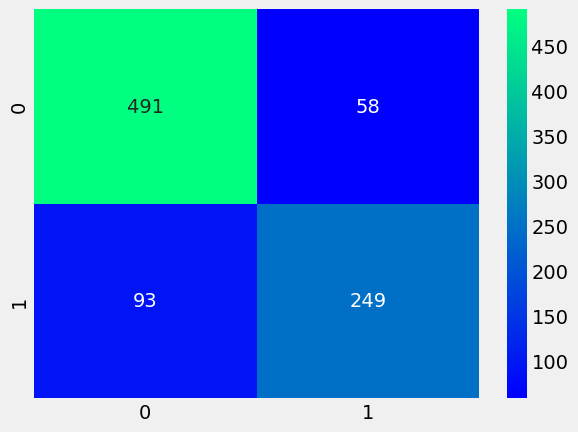

In [151]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap="winter", annot=True, fmt="2.0f")
plt.show()

### Feature Importance

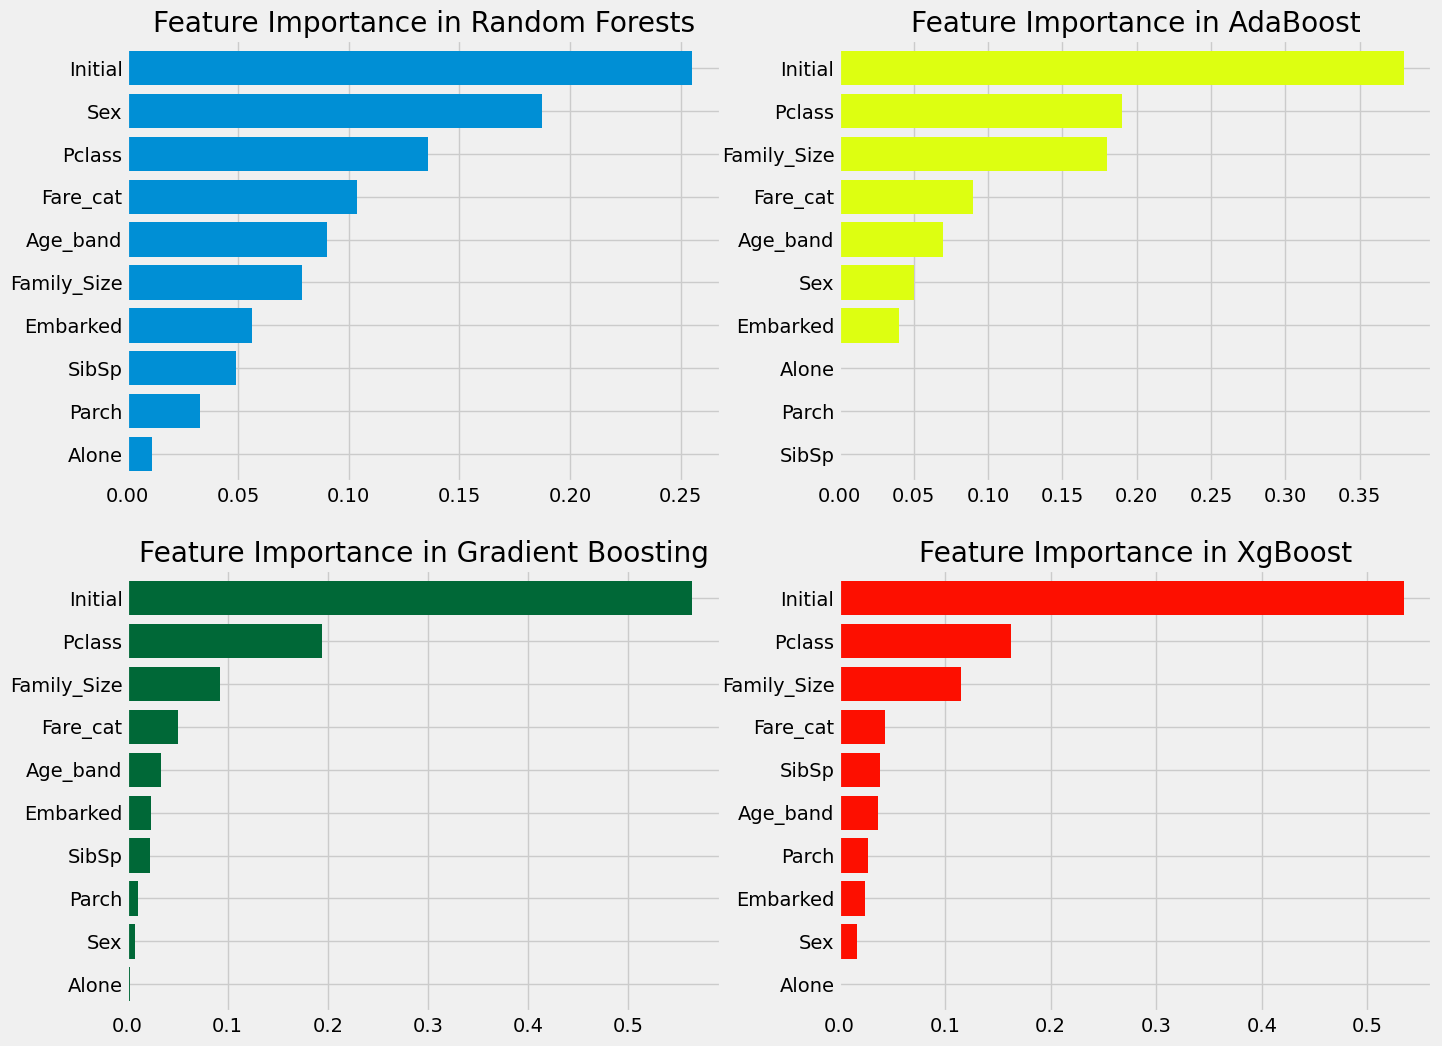

In [156]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=300, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[0, 0]
)
ax[0, 0].set_title("Feature Importance in Random Forests")

model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[0, 1], color="#ddff11"
)
ax[0, 1].set_title("Feature Importance in AdaBoost")

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[1, 0], cmap="RdYlGn_r"
)
ax[1, 0].set_title("Feature Importance in Gradient Boosting")

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(
    width=0.8, ax=ax[1, 1], color="#FD0F00"
)
ax[1, 1].set_title("Feature Importance in XgBoost")

plt.show()

We can see the important featurse for various classifiers like RandomForests, AdaBoost, etc.

#### Observations:
1) Some of the common important features are initial, Fare_cat, Pclass, Family_Size.

2) The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests. However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3) Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch and SibSp.